# Ensemble Supervised Learning-based Approaches for Mobile Network Coverage and Quality Predictions in a University Setting

In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

## Four Operators Benchmark Test: 
Three (3) Mobile, Vodafone, TESCO Mobile (Resprenting O2 Mobile), and EE

In [2]:
# loading the benchmark datasets
df3 = pd.read_csv("D:/Dataset_RP\Dataset_RP/3_UniHull_bm.csv") # Three
df4 = pd.read_csv("D:/Dataset_RP\Dataset_RP/EE_UniHull_bm.csv") # EE
df5 = pd.read_csv("D:/Dataset_RP\Dataset_RP/TESCO_UniHull_bm.csv") # TESCO (O2)
df6 = pd.read_csv("D:Dataset_RP\Dataset_RP/vodafone_UK_UniHull_bm.csv") # Vodafone

In [3]:
# Viewing first two rows for Three
df3.head(2)

Timestamp  Longitude   Latitude  Speed  Operatorname  Operator  \
0  04/10/2023 17:18   -0.36275  53.770560      2             3     23420   
1  04/10/2023 17:18   -0.36285  53.770448      0             3     23420   

            CGI  Cellname   Node  CellID  ...  NTech18 NCellName18 NCellid18  \
0  2.342000e+14       NaN  50637      72  ...      NaN         NaN       NaN   
1  2.342000e+14       NaN  50637      72  ...      NaN         NaN       NaN   

   NLAC18 NCell18 NARFCN18 NRxLev18 NQual18  NDistance18  NBearing18  
0     NaN     NaN      NaN      NaN     NaN          NaN         NaN  
1     NaN     NaN      NaN      NaN     NaN          NaN         NaN  

[2 rows x 259 columns]

In [4]:
# Viewing first two rows for EE
df4.head(2)

Timestamp  Longitude   Latitude  Speed Operatorname  Operator  \
0  04/10/2023 17:18  -0.362919  53.770247      0           EE     23430   
1  04/10/2023 17:18  -0.362913  53.770307      0           EE     23430   

            CGI  Cellname   Node  CellID  ...  NTech18 NCellName18 NCellid18  \
0  2.343050e+14       NaN  24737       4  ...      NaN         NaN       NaN   
1  2.343050e+14       NaN  24737       4  ...      NaN         NaN       NaN   

   NLAC18  NCell18  NARFCN18 NRxLev18  NQual18  NDistance18  NBearing18  
0     NaN      NaN       NaN      NaN      NaN          NaN         NaN  
1     NaN      NaN       NaN      NaN      NaN          NaN         NaN  

[2 rows x 259 columns]

In [5]:
# Viewing first two rows for TESCO (O2)
df5.head(2)

Timestamp  Longitude   Latitude  Speed Operatorname  Operator  \
0  04/10/2023 17:18  -0.362919  53.770247      0        TESCO     23410   
1  04/10/2023 17:18  -0.362913  53.770307      0        TESCO     23410   

            CGI  Cellname    Node  CellID  ...  Unnamed: 266 Unnamed: 267  \
0  2.341030e+14       NaN  505947     125  ...           NaN          NaN   
1  2.341030e+14       NaN  505947     125  ...           NaN          NaN   

  Unnamed: 268  Unnamed: 269  Unnamed: 270  Unnamed: 271 Unnamed: 272  \
0          NaN           NaN           NaN           NaN          NaN   
1          NaN           NaN           NaN           NaN          NaN   

   Unnamed: 273  Unnamed: 274  Unnamed: 275  
0           NaN           NaN           NaN  
1           NaN           NaN           NaN  

[2 rows x 276 columns]

In [6]:
# Viewing first two rows for Vodafone
df6.head(2)

Timestamp  Longitude   Latitude  Speed          Operatorname  \
0  04/10/2023 17:18   -0.36275  53.770560      2  vodafone_UK_|_Airtel   
1  04/10/2023 17:18   -0.36285  53.770448      0  vodafone_UK_|_Airtel   

   Operator           CGI  Cellname    Node  CellID  ...  NTech18 NCellName18  \
0     23415  2.341540e+14       NaN  505948      25  ...      NaN         NaN   
1     23415  2.341540e+14       NaN  505948      25  ...      NaN         NaN   

  NCellid18  NLAC18  NCell18  NARFCN18 NRxLev18  NQual18  NDistance18  \
0       NaN     NaN      NaN       NaN      NaN      NaN          NaN   
1       NaN     NaN      NaN       NaN      NaN      NaN          NaN   

   NBearing18  
0         NaN  
1         NaN  

[2 rows x 259 columns]

## Reference Signal Received Power - RSRP (dBm)

### Data Cleaning, EDA, and Outlier Detection: RSRP

### OUTLIER detection in the Coordinates (i.e. Longitude and Latitude) using Local Outlier Factor (LOF)

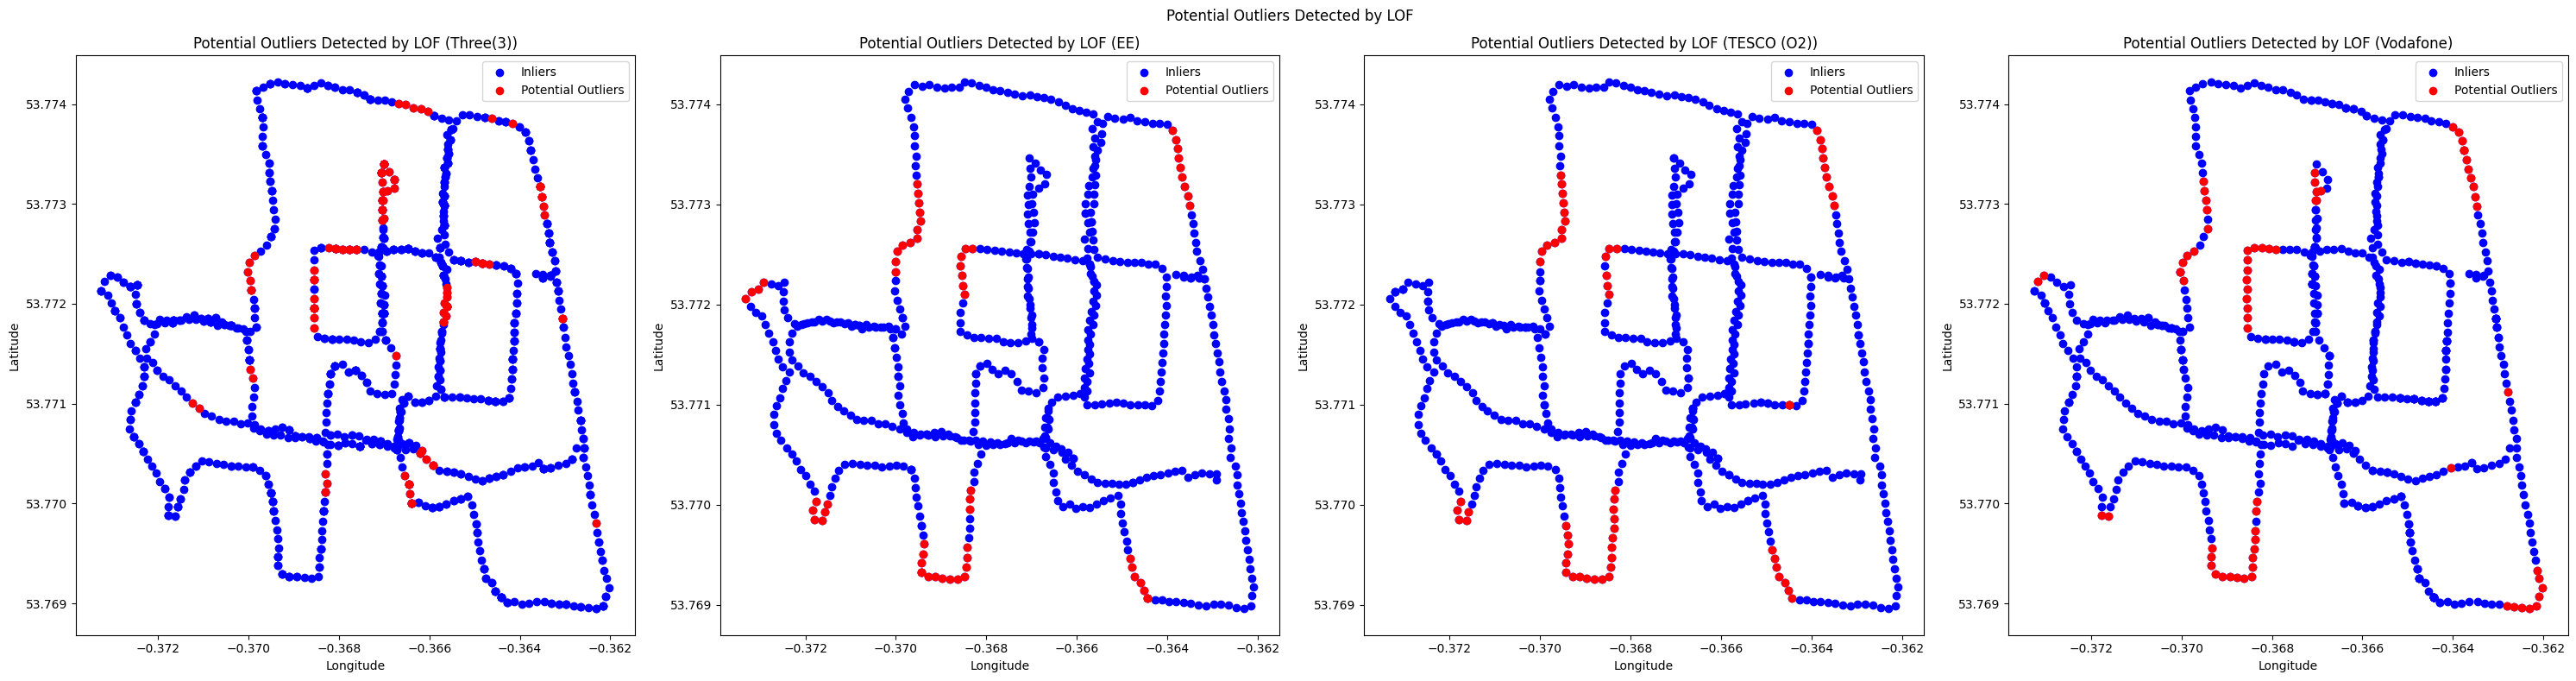

In [7]:
# Importing the required libraries
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

# Select the relevant features for LOF as longitude and latitude
selected_features = ['Longitude', 'Latitude']

# Create a figure with four subplots side by side
fig, axs = plt.subplots(1, 4, figsize=(30, 8))
fig.suptitle('Potential Outliers Detected by LOF')

# Define a list of dataframes
dfs = [df3, df4, df5, df6]

# Define a list of network operator names
operators = ['Three(3)', 'EE', 'TESCO (O2)', 'Vodafone']

# Loop through each dataframe and operator name
for i, (df, operator) in enumerate(zip(dfs, operators)):

    # Process the dataframe
    X = df[selected_features]

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply Local Outlier Factor
    lof = LocalOutlierFactor(n_neighbors=30, contamination=0.1)
    y_pred = lof.fit_predict(X_scaled)

    # Filter the potential outlier data points
    LOF_anomalies = df[y_pred == -1]

    # Visualize the data points with potential outliers in red
    axs[i].scatter(X['Longitude'], X['Latitude'], c='blue', label='Inliers')
    axs[i].scatter(LOF_anomalies['Longitude'], LOF_anomalies['Latitude'], c='red', label='Potential Outliers')
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')
    axs[i].set_title(f'Potential Outliers Detected by LOF ({operator})')
    axs[i].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show all plots side by side
plt.show()


The potential outliers from the coordinates will be kept as they depict important geo-locations for the University of Hull

### OUTLIER detection in RSRP (dBm) using the Interquartile Range (IQR)

In [8]:
# Three (3)
# Extract Coverage (RSRP)
coverage_3 = df3['Level']

# EE
# Extract Coverage (RSRP)
coverage_ee = df4['Level'] 

# TESCO (O2)
# Extract Coverage (RSRP)
coverage_tesco = df5['Level']

# Vodafone
# Extract Coverage (RSRP)
coverage_voda = df6['Level']

In [9]:
# Calculating Outlier limits for Three (3) with IQR

def calculate_outlier_limits(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

lower_limit, upper_limit = calculate_outlier_limits(coverage_3)

lower_limit, upper_limit 

(-142.5, -66.5)

In [10]:
#Calculating Outlier limits for EE with IQR

def calculate_outlier_limits(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

lower_limit, upper_limit = calculate_outlier_limits(coverage_ee)

lower_limit, upper_limit 

(-101.875, -58.875)

In [11]:
# Calculating Outlier limits for TESCO (O2) with IQR

def calculate_outlier_limits(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

lower_limit, upper_limit = calculate_outlier_limits(coverage_tesco)

lower_limit, upper_limit 

(-118.5, -58.5)

In [12]:
# Calculating Outlier limits for Vodafone with IQR

def calculate_outlier_limits(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

lower_limit, upper_limit = calculate_outlier_limits(coverage_voda)

lower_limit, upper_limit 

(-133.5, -57.5)

### OUTLIER detection in RSRP (dBm) by Visualizing and Applying Domain Knowledge

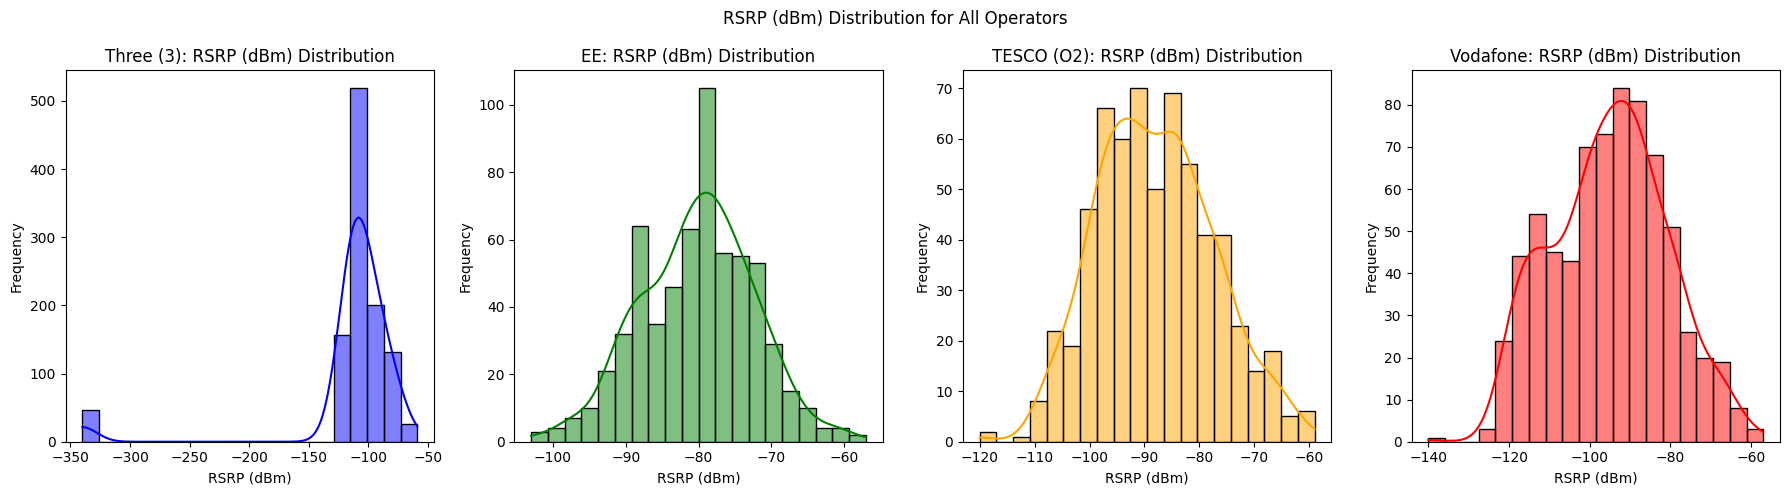

In [13]:
# Check for outliers in the mobile network coverage (RSRP)

# Create a figure with four subplots side by side
fig, axs = plt.subplots(1, 4, figsize=(18, 5))
fig.suptitle('RSRP (dBm) Distribution for All Operators')

# Plot for Three's (3) RSRP data
sns.histplot(x=coverage_3, bins=20, kde=True, color='blue', ax=axs[0])
axs[0].set_xlabel('RSRP (dBm)')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Three (3): RSRP (dBm) Distribution')

# Plot for EE's RSRP data
sns.histplot(x=coverage_ee, bins=20, kde=True, color='green', ax=axs[1])
axs[1].set_xlabel('RSRP (dBm)')
axs[1].set_ylabel('Frequency')
axs[1].set_title('EE: RSRP (dBm) Distribution')

# Plot for TESCO's (O2) RSRP data
sns.histplot(x=coverage_tesco, bins=20, kde=True, color='orange', ax=axs[2])
axs[2].set_xlabel('RSRP (dBm)')
axs[2].set_ylabel('Frequency')
axs[2].set_title('TESCO (O2): RSRP (dBm) Distribution')

# Plot for Vodafone's RSRP data
sns.histplot(x=coverage_voda, bins=20, kde=True, color='red', ax=axs[3])
axs[3].set_xlabel('RSRP (dBm)')
axs[3].set_ylabel('Frequency')
axs[3].set_title('Vodafone: RSRP (dBm) Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show all histograms side by side
plt.show()

Three (3) network is showing some potential outliers

In [14]:
# RSRP values check for Three (3)
df3["Level"].unique()

array([-115, -116, -113, -112, -111, -117, -110,  -93,  -88,  -85, -109,
       -108, -104, -103, -114, -101, -107, -105,  -82,  -84, -106,  -91,
       -118,  -90,  -83,  -76,  -89, -120, -124,  -87,  -80,  -86,  -75,
        -70,  -78, -340, -102,  -77, -121,  -74,  -98,  -96,  -95,  -92,
        -79, -119,  -81,  -72, -100,  -59,  -99,  -94,  -97, -122,  -69,
       -128, -123,  -71,  -68,  -73,  -66,  -63,  -64,  -67, -126, -125],
      dtype=int64)

RSRP value with -340dBm has been identified as an outlier in the Three (3) Mobile dataframe (df3) and will be removed

In [15]:
# Cleaning outliers in the df3 dataframe of Three (3) Mobile

# Drop rows where 'RSRP (Level)' contains '-340'
df3 = df3[df3['Level'] != -340]

# Three (3)
# Extract Coverage (RSRP)
coverage_3 = df3['Level']

In [16]:
# Validating changes
df3["Level"].unique()

array([-115, -116, -113, -112, -111, -117, -110,  -93,  -88,  -85, -109,
       -108, -104, -103, -114, -101, -107, -105,  -82,  -84, -106,  -91,
       -118,  -90,  -83,  -76,  -89, -120, -124,  -87,  -80,  -86,  -75,
        -70,  -78, -102,  -77, -121,  -74,  -98,  -96,  -95,  -92,  -79,
       -119,  -81,  -72, -100,  -59,  -99,  -94,  -97, -122,  -69, -128,
       -123,  -71,  -68,  -73,  -66,  -63,  -64,  -67, -126, -125],
      dtype=int64)

In [17]:
# Checking for nan values in Three
df3["Level"].isna().sum()

0

In [18]:
# RSRP values check for EE
df4["Level"].unique()

array([ -84,  -81,  -79,  -76,  -78,  -80,  -77,  -75,  -74,  -72,  -82,
        -70,  -85,  -83,  -68,  -69,  -96,  -73,  -71,  -67,  -66,  -87,
        -89,  -86,  -65,  -90,  -91,  -92,  -88,  -93,  -62,  -61,  -59,
        -60,  -64,  -57,  -97,  -98,  -99, -100, -102, -103,  -95,  -94],
      dtype=int64)

In [19]:
# RSRP nan values check for EE
df4["Level"].isna().sum()

0

In [20]:
# RSRP values check for TESCO (02)
df5["Level"].unique()

array([ -76,  -78,  -79,  -77,  -71,  -70,  -72,  -73,  -74,  -81,  -89,
        -86,  -90,  -92,  -88,  -83,  -87,  -91,  -85,  -84,  -82,  -96,
        -95,  -93,  -94, -100, -101, -104,  -99,  -98,  -97, -103, -120,
       -105, -106, -107, -108, -109, -110, -111, -102,  -67,  -66,  -68,
        -64,  -62,  -69,  -75,  -80,  -59,  -65,  -63,  -60], dtype=int64)

In [21]:
# RSRP nan values check for TESCO (O2)
df5["Level"].isna().sum()

0

In [22]:
# RSRP values check for Vodafone
df6["Level"].unique()

array([ -73,  -78,  -80,  -82,  -81, -116, -118, -117, -114, -112, -109,
       -113,  -62,  -79,  -83,  -84,  -76,  -77,  -85,  -87,  -92,  -95,
        -94,  -93,  -89,  -86,  -88,  -97,  -90, -104, -100, -101,  -98,
       -102, -103,  -96,  -99, -108, -140, -121, -105, -106, -107, -111,
       -110, -119,  -91, -120,  -70,  -69,  -67, -115,  -64,  -71,  -68,
        -57,  -63,  -66,  -74,  -72,  -75, -124, -126,  -59,  -58, -122,
       -123,  -65], dtype=int64)

In [23]:
# RSRP nan values check for Vodafone
df6["Level"].isna().sum()

0

#### Visualization validation checks against the potential ouliers removal

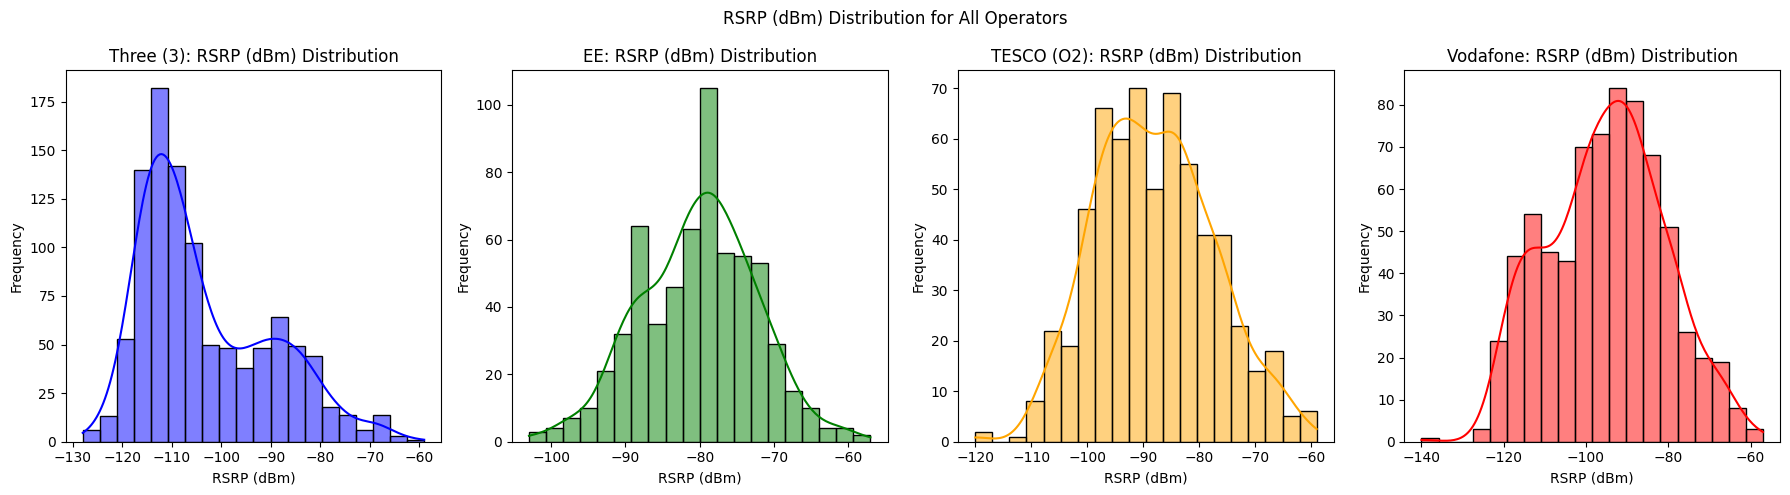

In [24]:
# Check for outliers in the mobile network coverage (RSRP)

# Create a figure with four subplots side by side
fig, axs = plt.subplots(1, 4, figsize=(18, 5))
fig.suptitle('RSRP (dBm) Distribution for All Operators')

# Plot for Three's (3) RSRP data
sns.histplot(x=coverage_3, bins=20, kde=True, color='blue', ax=axs[0])
axs[0].set_xlabel('RSRP (dBm)')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Three (3): RSRP (dBm) Distribution')

# Plot for EE's RSRP data
sns.histplot(x=coverage_ee, bins=20, kde=True, color='green', ax=axs[1])
axs[1].set_xlabel('RSRP (dBm)')
axs[1].set_ylabel('Frequency')
axs[1].set_title('EE: RSRP (dBm) Distribution')

# Plot for TESCO's (O2) RSRP data
sns.histplot(x=coverage_tesco, bins=20, kde=True, color='orange', ax=axs[2])
axs[2].set_xlabel('RSRP (dBm)')
axs[2].set_ylabel('Frequency')
axs[2].set_title('TESCO (O2): RSRP (dBm) Distribution')

# Plot for Vodafone's RSRP data
sns.histplot(x=coverage_voda, bins=20, kde=True, color='red', ax=axs[3])
axs[3].set_xlabel('RSRP (dBm)')
axs[3].set_ylabel('Frequency')
axs[3].set_title('Vodafone: RSRP (dBm) Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show all histograms side by side
plt.show()


The RSRP distribution is now balanced for all operators

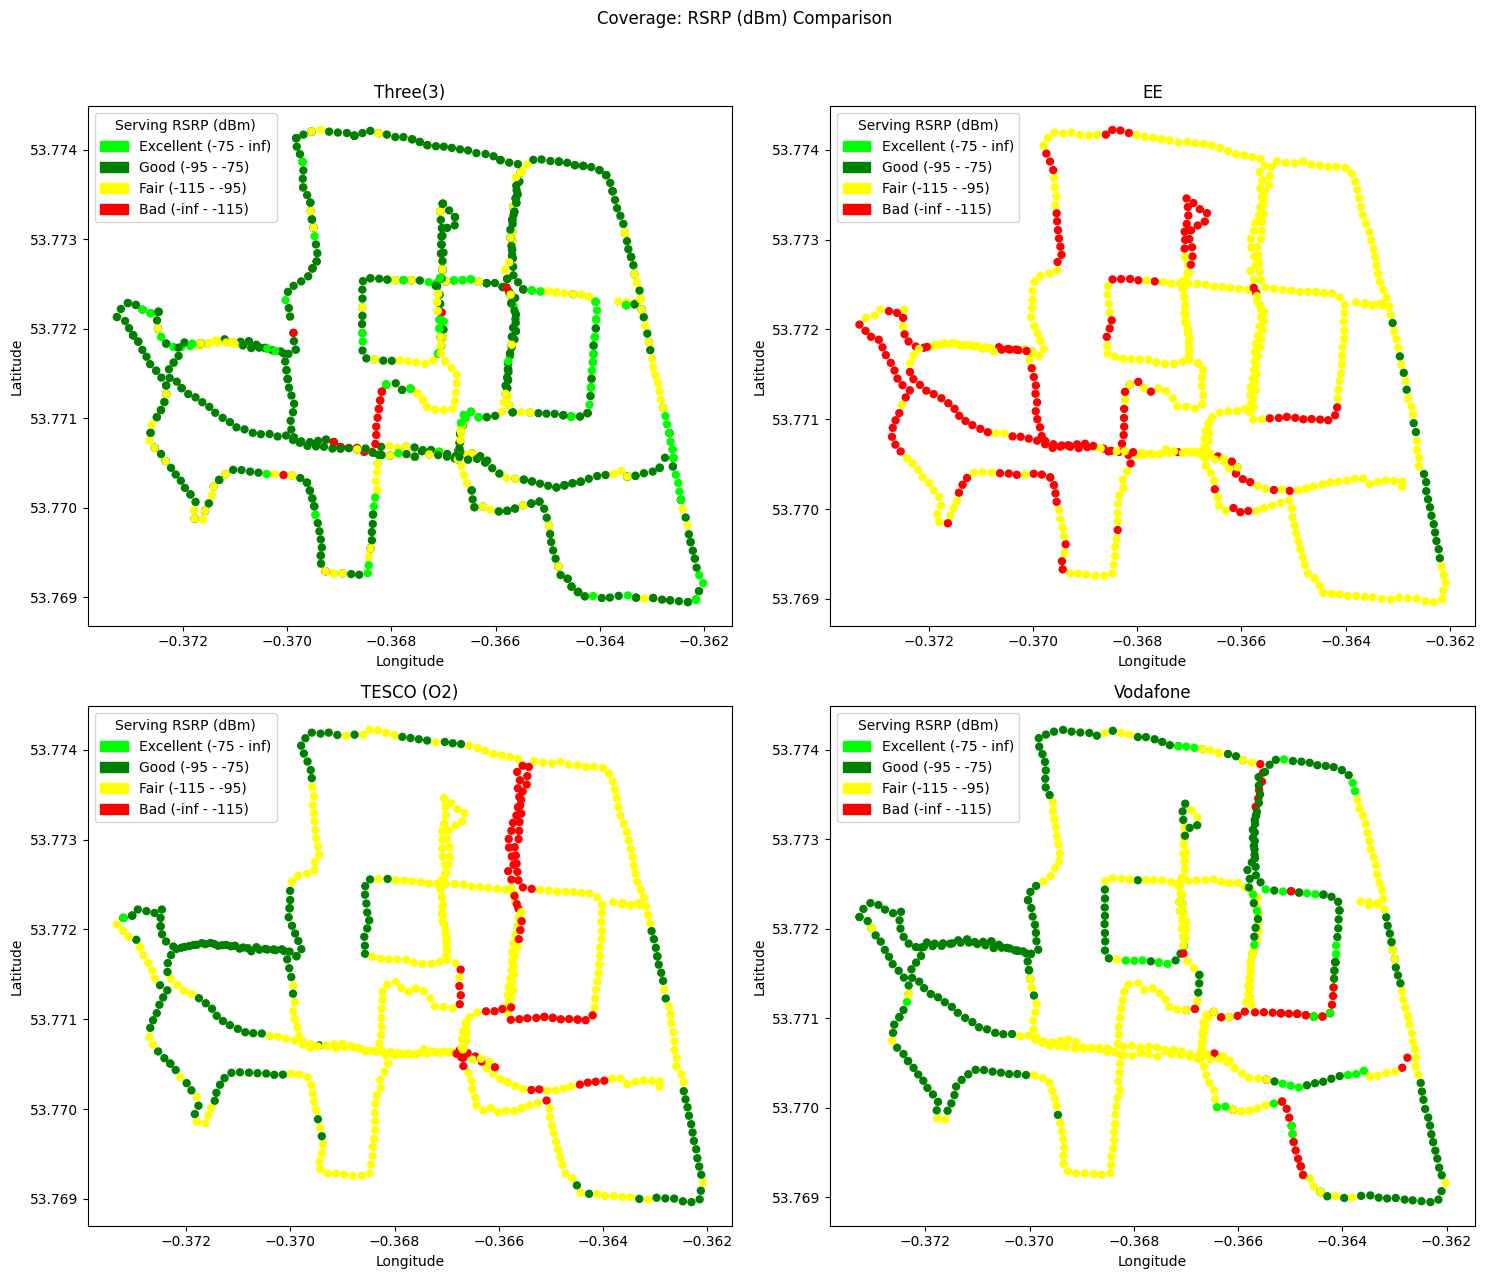

In [25]:
#Coverage (RSSP) comparison: Three (3), EE, TESCO (O2), and Vodafone

# Importing the requred libraries
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Three (3)
# Extract latitude, longitude, and Coverage (RSRP)
latitude3 = df3['Latitude']
longitude3 = df3['Longitude']
coverage_3 = df3['Level']

# EE
# Extract latitude, longitude, and Coverage (RSRP)
latitude4 = df4['Latitude']
longitude4 = df4['Longitude']
coverage_ee = df4['Level'] 

# TESCO (O2)
# Extract latitude, longitude, and Coverage (RSRP)
latitude5 = df5['Latitude']
longitude5 = df5['Longitude']
coverage_tesco = df5['Level']

# Vodafone
# Extract latitude, longitude, and Coverage (RSRP)
latitude6 = df6['Latitude']
longitude6 = df6['Longitude']
coverage4 = df6['Level'] 

# Set up subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 13))
fig.suptitle('Coverage: RSRP (dBm) Comparison')

# Define RSRP ranges and corresponding colors
rsrp_ranges = {
    'Excellent': (-75, float('inf')),
    'Good': (-95, -75),
    'Fair': (-115, -95),
    'Bad': (float('-inf'), -115)
}

# Create a colormap that maps RSRP ranges to colors
cmap = mcolors.ListedColormap(['lime', 'green', 'yellow', 'red'])

# Create empty handles and labels for the legends
legend_handles = []
legend_labels = []

# Define colors corresponding to RSRP ranges
colors = ['lime', 'green', 'yellow', 'red']

# Loop through RSRP ranges and colors to create legends
for rsrp_range, color in zip(rsrp_ranges.keys(), colors):
    legend_handles.append(mpatches.Patch(color=color))
    legend_labels.append(f'{rsrp_range} ({rsrp_ranges[rsrp_range][0]} - {rsrp_ranges[rsrp_range][1]})')
# Create a norm object to map RSRP values to the colormap
norm = mcolors.BoundaryNorm([rsrp_ranges['Bad'][0], rsrp_ranges['Fair'][0], rsrp_ranges['Good'][0], 
        rsrp_ranges['Excellent'][0], rsrp_ranges['Excellent'][1]], cmap.N)

# Define marker size
marker_size = 100

# Create legend titles
legend_titles = ['Serving RSRP (dBm)'] * 4 

# Three(3)
sc1 = axs[0, 0].scatter(longitude3, latitude3, c=coverage_3, cmap=cmap, norm=norm, marker='.', s=marker_size)
axs[0, 0].set_title('Three(3)')
axs[0, 0].set_xlabel('Longitude')
axs[0, 0].set_ylabel('Latitude')
legend1 = axs[0, 0].legend(handles=legend_handles, labels=legend_labels, loc='upper left', title=legend_titles[0])
legend1.get_title().set_fontsize('medium') 

# EE
sc2 = axs[0, 1].scatter(longitude4, latitude4, c=coverage_ee, cmap=cmap, norm=norm, marker='.', s=marker_size)
axs[0, 1].set_title('EE')
axs[0, 1].set_xlabel('Longitude')
axs[0, 1].set_ylabel('Latitude')
legend2 = axs[0, 1].legend(handles=legend_handles, labels=legend_labels, loc='upper left', title=legend_titles[0])
legend2.get_title().set_fontsize('medium') 

# TESCO (O2)
sc3 = axs[1, 0].scatter(longitude5, latitude5, c=coverage_tesco, cmap=cmap, norm=norm, marker='.', s=marker_size)
axs[1, 0].set_title('TESCO (O2)')
axs[1, 0].set_xlabel('Longitude')
axs[1, 0].set_ylabel('Latitude')
legend3 = axs[1, 0].legend(handles=legend_handles, labels=legend_labels, loc='upper left', title=legend_titles[0])
legend3.get_title().set_fontsize('medium') 

# Vodafone
sc4 = axs[1, 1].scatter(longitude6, latitude6, c=coverage4, cmap=cmap, norm=norm, marker='.', s=marker_size)
axs[1, 1].set_title('Vodafone')
axs[1, 1].set_xlabel('Longitude')
axs[1, 1].set_ylabel('Latitude')
legend4 = axs[1, 1].legend(handles=legend_handles, labels=legend_labels, loc='upper left', title=legend_titles[0])
legend4.get_title().set_fontsize('medium')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()


## Reference Signal Received Quality - RSRQ (dB)

### Data Cleaning, EDA, and Outlier Detection: RSRQ

In [26]:
# Checking the unique quality values in Three
df3["Qual"].unique()

array(['-15', '-14', '-16', '-18', '-17', '-11', '-13', '-20', '-12',
       '-22', '-10', '-19', '-21', '-24'], dtype=object)

In [27]:
# Checking nan ("-") entries in Three
(df3["Qual"] == "-").sum()

0

In [28]:
# Checking nan values in Three
df3["Qual"].isna().sum()

0

In [29]:
# Cleaning nan ("-") entries in Three (3) Mobile

# Drop rows where 'RSRQ (Qual)' contains '-'
df3 = df3[df3['Qual'] != '-']

# Convert the 'RSRQ' column to integers
df3['Qual'] = df3['Qual'].astype(int)

In [30]:
# Displaying information (data type etc.) in Three
df3["Qual"].info()

<class 'pandas.core.series.Series'>
Index: 1035 entries, 0 to 1081
Series name: Qual
Non-Null Count  Dtype
--------------  -----
1035 non-null   int32
dtypes: int32(1)
memory usage: 12.1 KB


In [31]:
# Checking the unique quality values in EE
df4["Qual"].unique()

array([-15, -14, -12, -13, -16, -17, -11,  -9, -10, -19, -18], dtype=int64)

In [32]:
# Checking nan values in EE
df4["Qual"].isna().sum()

0

In [33]:
# Checking the unique quality values in TESCO (O2)
df5["Qual"].unique()

array([ -9,  -7,  -8, -10, -13,  -6, -11, -12, -14, -19, -18, -16, -15],
      dtype=int64)

In [34]:
# Checking nan values in TESCO (O2)
df5["Qual"].isna().sum()

0

In [35]:
# Checking the unique quality values in Vodafone
df6["Qual"].unique()

array([-12,  -8, -10,  -9, -11, -13, -15, -14, -18, -20,  -7, -17, -16,
       -19,  -6], dtype=int64)

In [36]:
# Checking nan values in Vodafone
df6["Qual"].isna().sum()

0

### OUTLIER detection in RSRQ (dB) using Interquartile Range (IQR)

In [37]:
# Extract latitude, longitude, and Quality (RSRQ) for each network operator

# Three
latitude3 = df3['Latitude']
longitude3 = df3['Longitude']
rsrq_3 = df3['Qual']
# EE
latitude4 = df4['Latitude']
longitude4 = df4['Longitude']
rsrq_ee = df4['Qual']
# TESCO (O2)
latitude5 = df5['Latitude']
longitude5 = df5['Longitude']
rsrq_tesco = df5['Qual']
# Vodafone
latitude6 = df6['Latitude']
longitude6 = df6['Longitude']
rsrq_voda = df6['Qual']

In [38]:
# Calculating RSRQ Outlier limits for Three (3) with IQR

def calculate_outlier_limits(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

lower_limit, upper_limit = calculate_outlier_limits(rsrq_3)

lower_limit, upper_limit 

(-19.5, -7.5)

In [39]:
# Calculating RSRQ Outlier limits for EE with IQR

def calculate_outlier_limits(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

lower_limit, upper_limit = calculate_outlier_limits(rsrq_ee)

lower_limit, upper_limit 

(-16.5, -12.5)

In [40]:
# Calculating RSRQ Outlier limits for TESCO (O2) with IQR

def calculate_outlier_limits(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

lower_limit, upper_limit = calculate_outlier_limits(rsrq_tesco)

lower_limit, upper_limit 

(-14.0, -6.0)

In [41]:
# Calculating RSRQ Outlier limits for Vodafone with IQR

def calculate_outlier_limits(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

lower_limit, upper_limit = calculate_outlier_limits(rsrq_voda)

lower_limit, upper_limit 

(-18.5, -6.5)

### OUTLIER detection in RSRQ (dB) by Visualizing and Applying Domain Knowledge

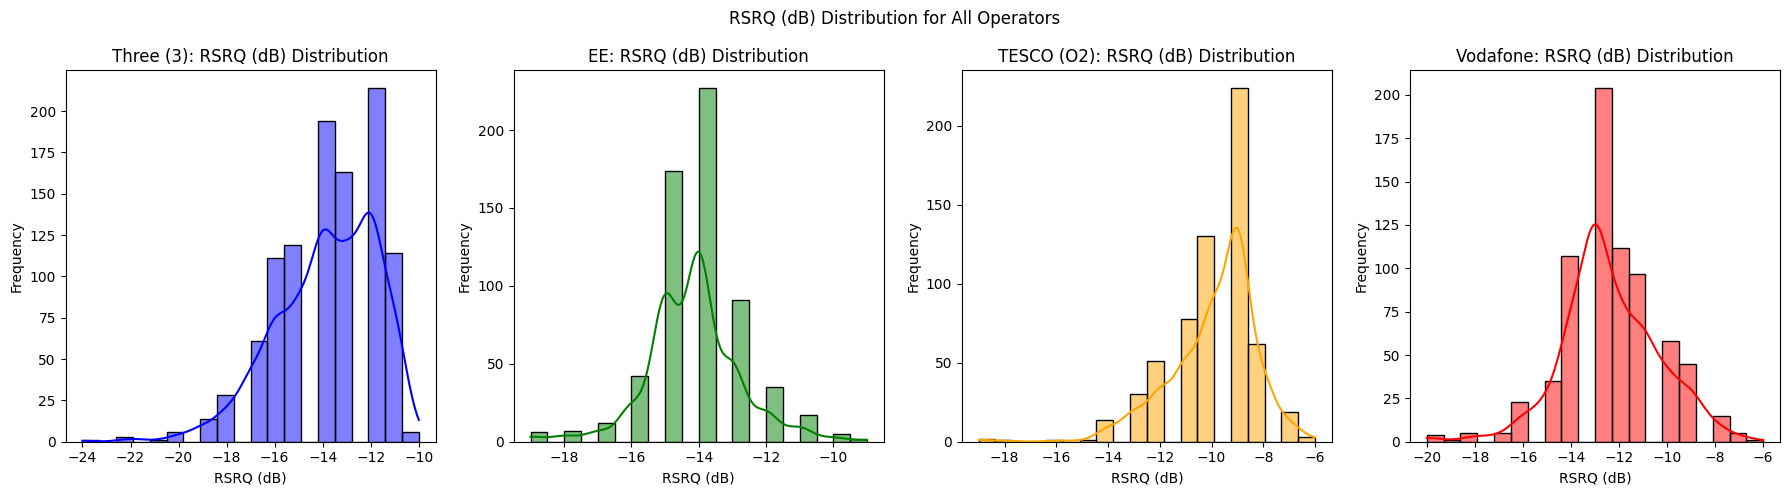

In [42]:
# Check for outliers in the mobile network quality: RSRQ

# Create a figure with four subplots side by side
fig, axs = plt.subplots(1, 4, figsize=(18, 5))
fig.suptitle('RSRQ (dB) Distribution for All Operators')

# Plot for Three's (3) RSRQ data
sns.histplot(x=rsrq_3, bins=20, kde=True, color='blue', ax=axs[0])
axs[0].set_xlabel('RSRQ (dB)')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Three (3): RSRQ (dB) Distribution')

# Plot for EE's RSRQ data
sns.histplot(x=rsrq_ee, bins=20, kde=True, color='green', ax=axs[1])
axs[1].set_xlabel('RSRQ (dB)')
axs[1].set_ylabel('Frequency')
axs[1].set_title('EE: RSRQ (dB) Distribution')

# Plot for TESCO's (O2) RSRQ data
sns.histplot(x=rsrq_tesco, bins=20, kde=True, color='orange', ax=axs[2])
axs[2].set_xlabel('RSRQ (dB)')
axs[2].set_ylabel('Frequency')
axs[2].set_title('TESCO (O2): RSRQ (dB) Distribution')

# Plot for Vodafone's RSRQ data
sns.histplot(x=rsrq_voda, bins=20, kde=True, color='red', ax=axs[3])
axs[3].set_xlabel('RSRQ (dB)')
axs[3].set_ylabel('Frequency')
axs[3].set_title('Vodafone: RSRQ (dB) Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show all histograms side by side
plt.show()


The RSRQ distribution is approximately balanced for all four network operators

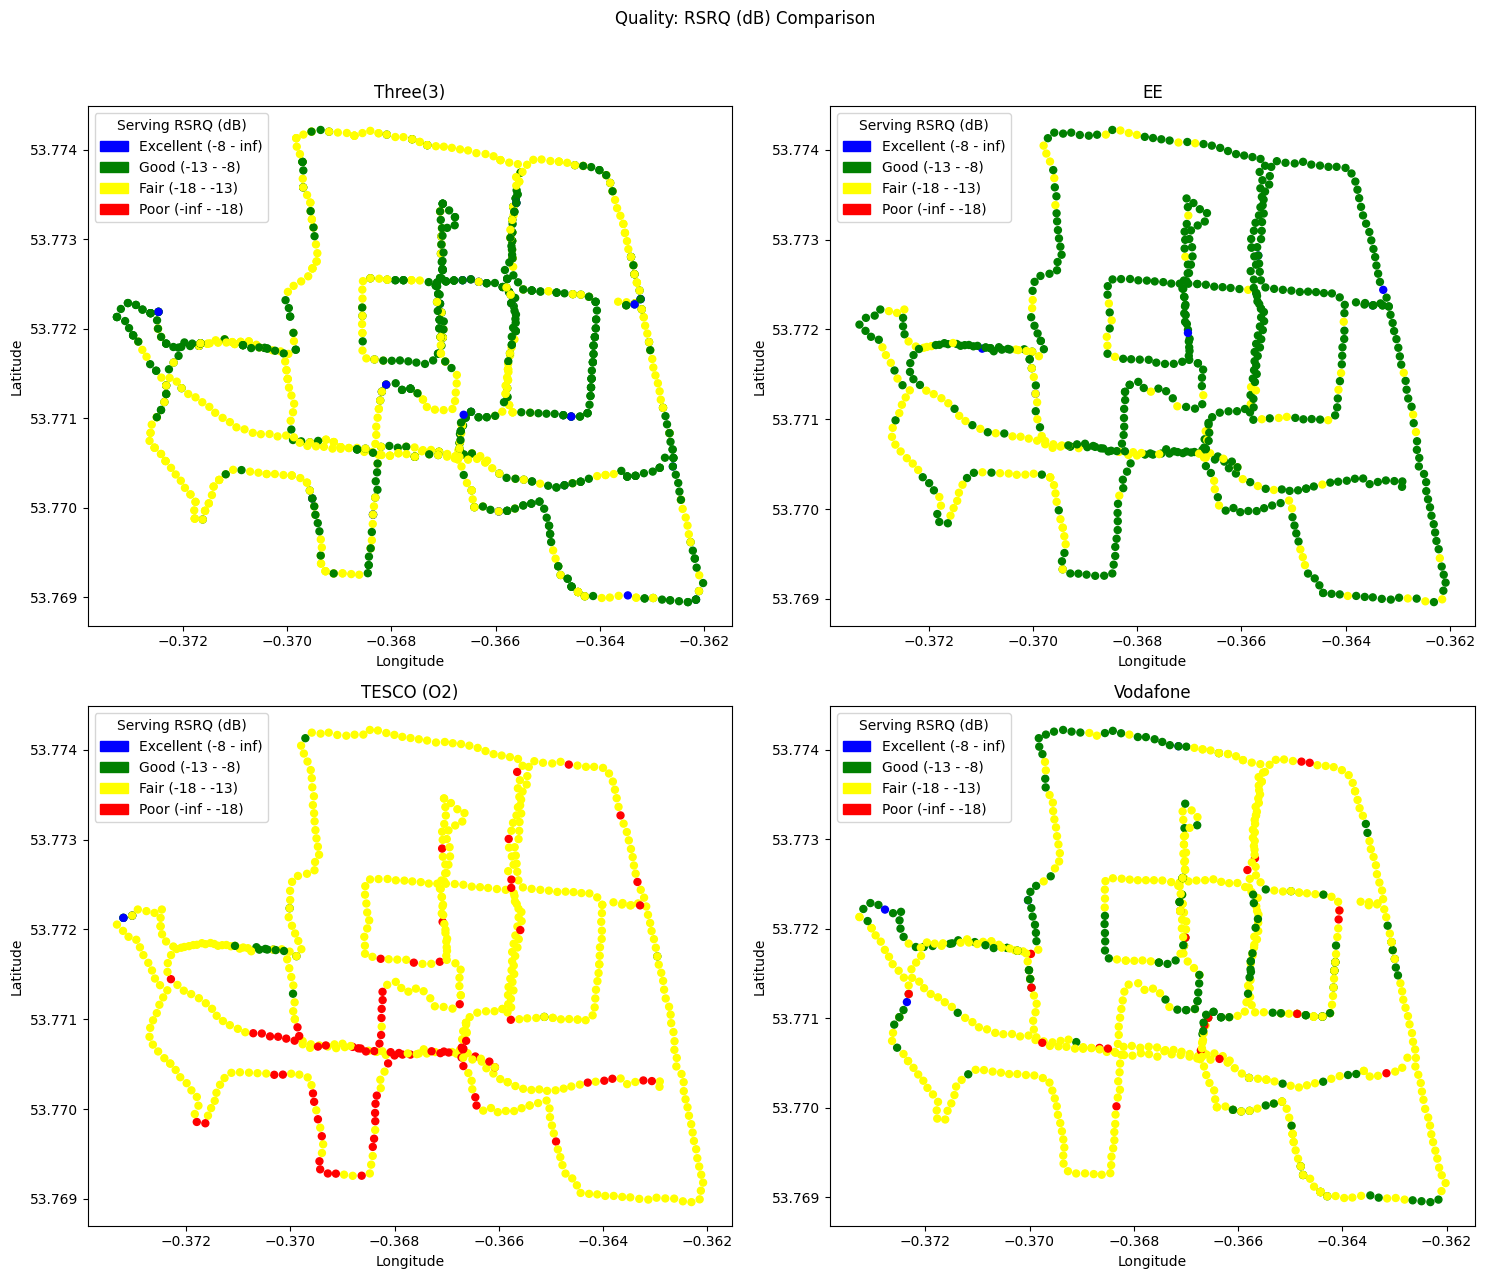

In [43]:
# Quality (RSRQ) comparison: Three (3), EE, TESCO (O2), and Vodafone

# Extract latitude, longitude, and Quality (RSRQ) for each network operator
latitude3 = df3['Latitude']
longitude3 = df3['Longitude']
rsrq_3 = df3['Qual']

latitude4 = df4['Latitude']
longitude4 = df4['Longitude']
rsrq_ee = df4['Qual']

latitude5 = df5['Latitude']
longitude5 = df5['Longitude']
rsrq_tesco = df5['Qual']

latitude6 = df6['Latitude']
longitude6 = df6['Longitude']
rsrq_voda = df6['Qual']

# Set up subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 13))
fig.suptitle('Quality: RSRQ (dB) Comparison')

# Define RSRQ ranges and corresponding colors
rsrq_ranges = {
    'Excellent': (-8, float('inf')),
    'Good': (-13, -8),
    'Fair': (-18, -13),
    'Poor': (float('-inf'), -18)
}

# Create a colormap that maps RSRQ ranges to colors
cmap = mcolors.ListedColormap(['blue', 'green', 'yellow', 'red'])

# Create empty handles and labels for the legends
legend_handles = []
legend_labels = []

# Define colors corresponding to RSRQ ranges
colors = ['blue', 'green', 'yellow', 'red']

# Loop through RSRQ ranges and colors to create legends
for rsrq_range, color in zip(rsrq_ranges.keys(), colors):
    legend_handles.append(mpatches.Patch(color=color))
    legend_labels.append(f'{rsrq_range} ({rsrq_ranges[rsrq_range][0]} - {rsrq_ranges[rsrq_range][1]})')

# Create a norm object to map RSRQ values to the colormap
norm = mcolors.BoundaryNorm([rsrq_ranges['Poor'][0], rsrq_ranges['Fair'][0], rsrq_ranges['Good'][0], 
        rsrq_ranges['Excellent'][0], rsrq_ranges['Excellent'][1]], cmap.N)

# Define marker size
marker_size = 100

# Create legend titles
legend_titles = ['Serving RSRQ (dB)'] * 4 

# Plot for Three(3)
sc1 = axs[0, 0].scatter(longitude3, latitude3, c=rsrq_3, cmap=cmap, norm=norm, marker='.', s=marker_size)
axs[0, 0].set_title('Three(3)')
axs[0, 0].set_xlabel('Longitude')
axs[0, 0].set_ylabel('Latitude')
legend1 = axs[0, 0].legend(handles=legend_handles, labels=legend_labels, loc='upper left', title=legend_titles[0])
legend1.get_title().set_fontsize('medium') 

# Plot for EE
sc2 = axs[0, 1].scatter(longitude4, latitude4, c=rsrq_ee, cmap=cmap, norm=norm, marker='.', s=marker_size)
axs[0, 1].set_title('EE')
axs[0, 1].set_xlabel('Longitude')
axs[0, 1].set_ylabel('Latitude')
legend2 = axs[0, 1].legend(handles=legend_handles, labels=legend_labels, loc='upper left', title=legend_titles[0])
legend2.get_title().set_fontsize('medium') 

# Plot for TESCO (O2)
sc3 = axs[1, 0].scatter(longitude5, latitude5, c=rsrq_tesco, cmap=cmap, norm=norm, marker='.', s=marker_size)
axs[1, 0].set_title('TESCO (O2)')
axs[1, 0].set_xlabel('Longitude')
axs[1, 0].set_ylabel('Latitude')
legend3 = axs[1, 0].legend(handles=legend_handles, labels=legend_labels, loc='upper left', title=legend_titles[0])
legend3.get_title().set_fontsize('medium') 

# Plot for Vodafone
sc4 = axs[1, 1].scatter(longitude6, latitude6, c=rsrq_voda, cmap=cmap, norm=norm, marker='.', s=marker_size)
axs[1, 1].set_title('Vodafone')
axs[1, 1].set_xlabel('Longitude')
axs[1, 1].set_ylabel('Latitude')
legend4 = axs[1, 1].legend(handles=legend_handles, labels=legend_labels, loc='upper left', title=legend_titles[0])
legend4.get_title().set_fontsize('medium')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()


### Signal to Interference and Noise Ratio - SINR (dB)

### Data Cleaning, EDA, and Outlier Detection: SINR

In [44]:
# Three (3) SINR values check
df3["SNR"].unique()

array(['-3', '-2', '0', '-1', '-7', '-5', '1', '2', '-12', '-6', '4', '5',
       '7', '9', '8', '6', '13', '12', '-10', '3', '-8', '-', '15', '20',
       '19', '18', '16', '14', '-4', '11', '10', '-9', '-16', '-11',
       '-14', '-17', '-13'], dtype=object)

In [45]:
# Checking nan ("-") entries in SNR column of the Three (3) network
(df3["SNR"] == "-").sum()

5

In [46]:
# Cleaning SNR nan ("-") entries in the df3 dataframe of Three (3) Mobile

# Drop rows where 'SNR' contains '-'
df3 = df3[df3['SNR'] != '-']

# Convert the 'SNR' column to integers
df3['SNR'] = df3['SNR'].astype(int)

In [47]:
# Validating changes in the Three (3) network
df3["SNR"].isna().sum()

0

In [48]:
# EE SINR values check
df4["SNR"].unique()

array([11, 21, 18, 19, 15, 17, 16, 14, 22, 13, 23,  8, 12, 10,  5,  9,  7,
        6,  3,  1,  0, -9, -3,  2, -1, -2, -6, 20,  4, -5, -8, -4, -7, 24],
      dtype=int64)

In [49]:
# EE nan values check
df4["SNR"].isna().sum()

0

In [50]:
# TESCO (O) SINR values check
df5["SNR"].unique()

array([ 23,  20,  11,  18,  13,  14,  21,  17,   9,   5,   4,  -1,  12,
        19,  15,  16,  10,  22,   8,   6,   3,   2,   7,   0,   1,  -5,
        -3,  -4,  -6,  -2,  24, -11], dtype=int64)

In [51]:
# TESCO (O) nan values check
df5["SNR"].isna().sum()

0

In [52]:
# Vodafone SINR values check
df6["SNR"].unique()

array([0], dtype=int64)

In [53]:
# Vodafone nan values check
df6["SNR"].isna().sum()

0

### OUTLIER detection in SINR (dB) by IQR, Visualizing and Applying Domain Knowledge

In [54]:
# Extract latitude, longitude, and SINR for each network operator
latitude3 = df3['Latitude']
longitude3 = df3['Longitude']
sinr_3 = df3['SNR']

latitude4 = df4['Latitude']
longitude4 = df4['Longitude']
sinr_ee = df4['SNR']

latitude5 = df5['Latitude']
longitude5 = df5['Longitude']
sinr_tesco = df5['SNR']

latitude6 = df6['Latitude']
longitude6 = df6['Longitude']
sinr_voda = df6['SNR']

In [55]:
# Calculating SINR Outlier limits for Three (3) with IQR

def calculate_outlier_limits(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

lower_limit, upper_limit = calculate_outlier_limits(sinr_3)

lower_limit, upper_limit 

(-8.5, 11.5)

In [56]:
# Calculating SINR Outlier limits for EE with IQR

def calculate_outlier_limits(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

lower_limit, upper_limit = calculate_outlier_limits(sinr_ee)

lower_limit, upper_limit 

(-21.5, 38.5)

In [57]:
# Calculating SINR Outlier limits for TESCO (O2) with IQR

def calculate_outlier_limits(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

lower_limit, upper_limit = calculate_outlier_limits(sinr_tesco)

lower_limit, upper_limit 

(-13.5, 30.5)

In [58]:
# Calculating SINR Outlier limits for Vodafone with IQR

def calculate_outlier_limits(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

lower_limit, upper_limit = calculate_outlier_limits(sinr_voda)

lower_limit, upper_limit 

(0.0, 0.0)

The SINR values are suspected to be unreal for Vodafone network

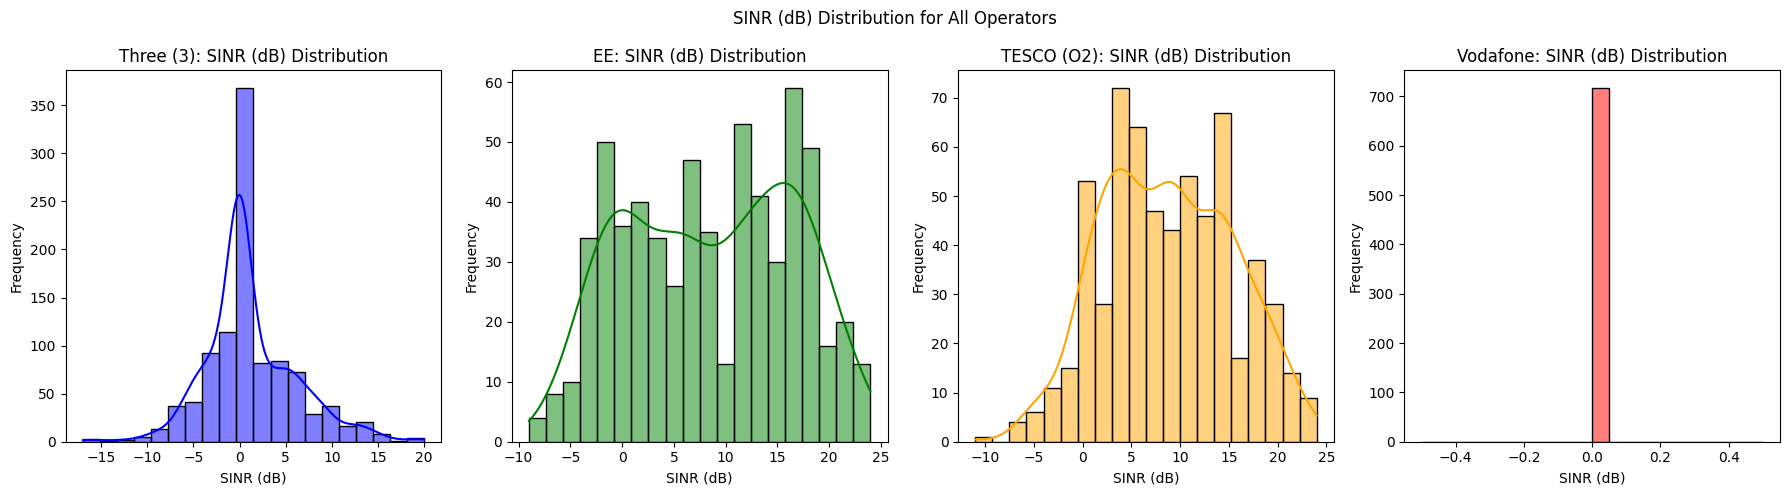

In [59]:
# Check for outliers in SINR

# Create a figure with four subplots side by side
fig, axs = plt.subplots(1, 4, figsize=(18, 5))
fig.suptitle('SINR (dB) Distribution for All Operators')

# Plot for Three's (3) SINR data
sns.histplot(x=sinr_3, bins=20, kde=True, color='blue', ax=axs[0])
axs[0].set_xlabel('SINR (dB)')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Three (3): SINR (dB) Distribution')

# Plot for EE's SINR data
sns.histplot(x=sinr_ee, bins=20, kde=True, color='green', ax=axs[1])
axs[1].set_xlabel('SINR (dB)')
axs[1].set_ylabel('Frequency')
axs[1].set_title('EE: SINR (dB) Distribution')

# Plot for TESCO's (O2) SINR data
sns.histplot(x=sinr_tesco, bins=20, kde=True, color='orange', ax=axs[2])
axs[2].set_xlabel('SINR (dB)')
axs[2].set_ylabel('Frequency')
axs[2].set_title('TESCO (O2): SINR (dB) Distribution')

# Plot for Vodafone's SINR data
sns.histplot(x=sinr_voda, bins=20, kde=True, color='red', ax=axs[3])
axs[3].set_xlabel('SINR (dB)')
axs[3].set_ylabel('Frequency')
axs[3].set_title('Vodafone: SINR (dB) Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show all histograms side by side
plt.show()


The SINR values are suspected to be unreal for Vodafone network

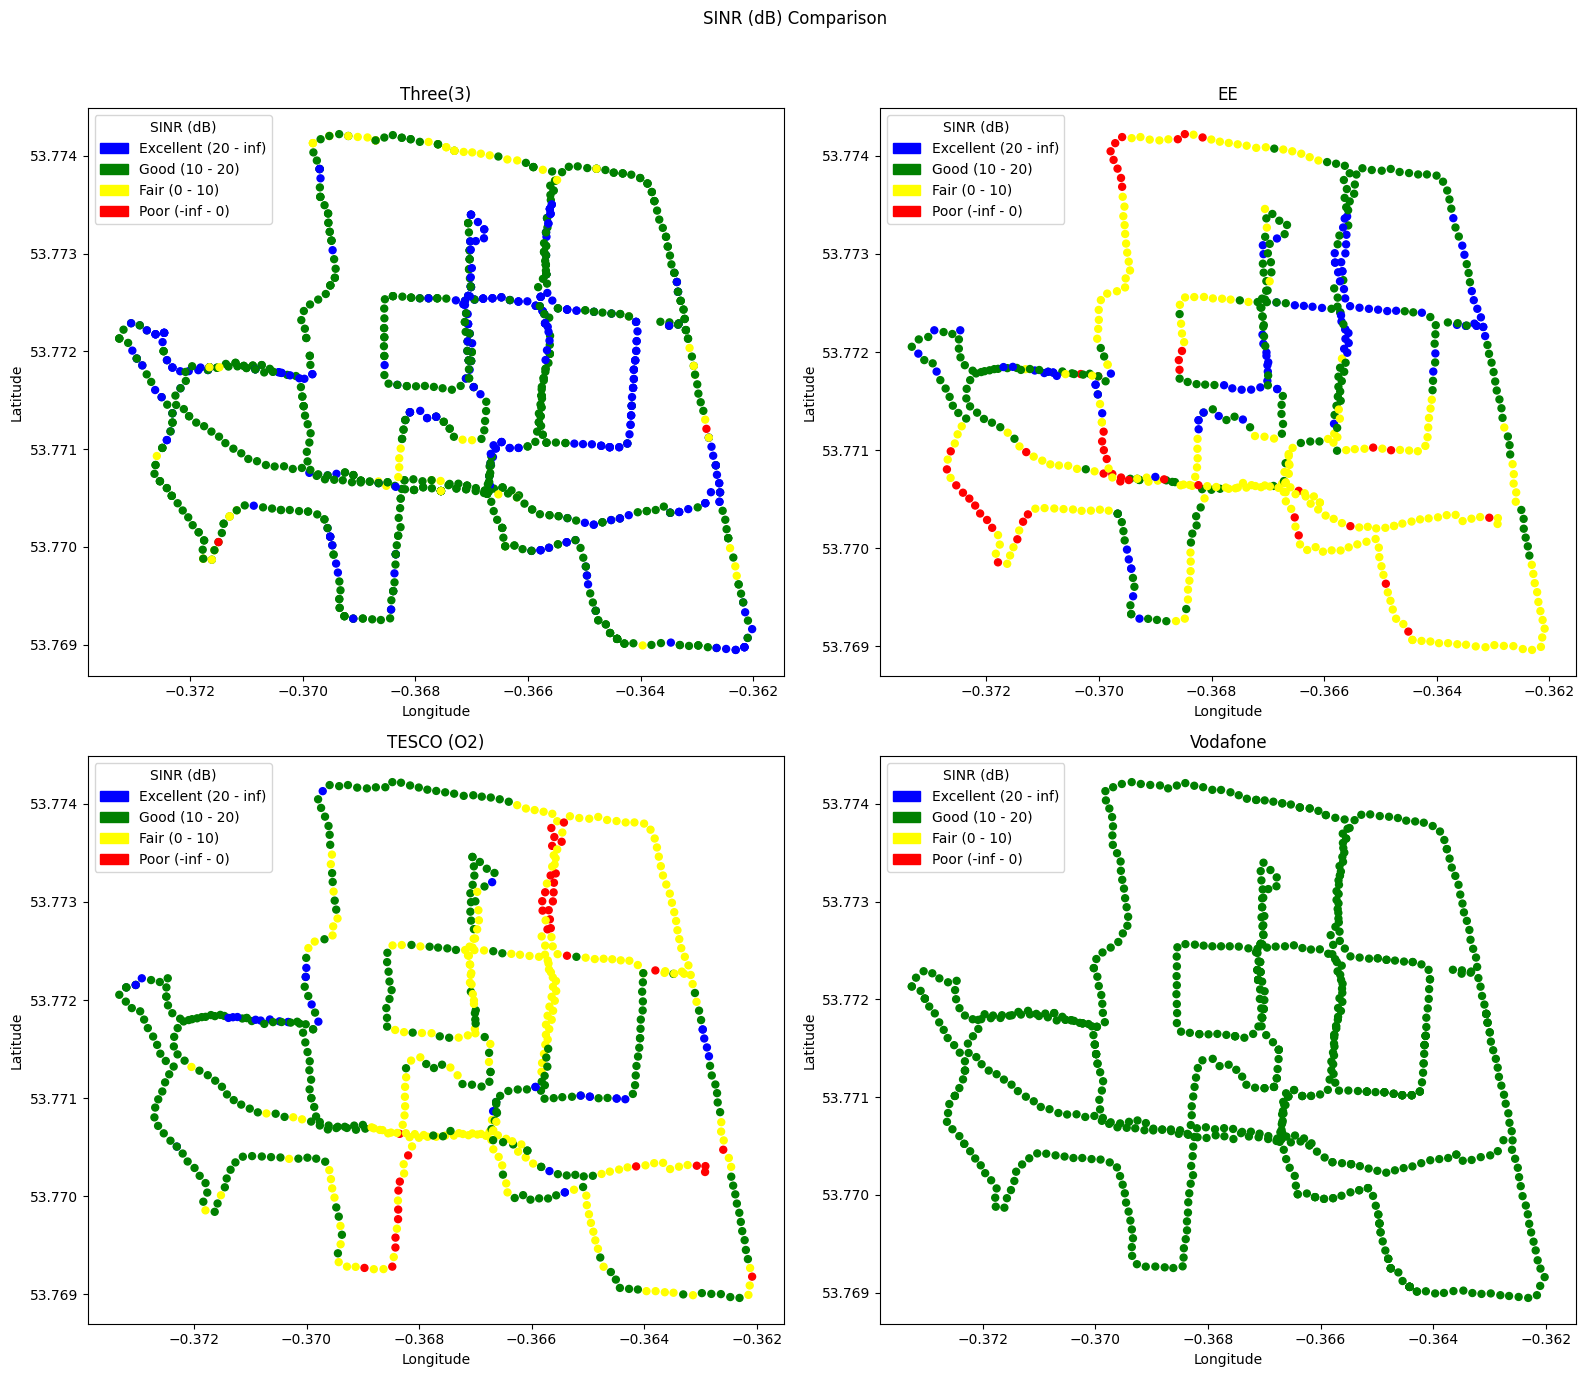

In [60]:
# Extract latitude, longitude, and SINR for each network operator

# Three
latitude3 = df3['Latitude']
longitude3 = df3['Longitude']
sinr_3 = df3['SNR']
# EE
latitude4 = df4['Latitude']
longitude4 = df4['Longitude']
sinr_ee = df4['SNR']
# TESCO (O2)
latitude5 = df5['Latitude']
longitude5 = df5['Longitude']
sinr_tesco = df5['SNR']
# Vodafone
latitude6 = df6['Latitude']
longitude6 = df6['Longitude']
sinr_voda = df6['SNR']


# Set up subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('SINR (dB) Comparison')

# Define SINR ranges and corresponding colors
sinr_ranges = {
    'Excellent': (20, float('inf')),
    'Good': (10, 20),
    'Fair': (0, 10),
    'Poor': (float('-inf'), 0)
}

# Create a colormap that maps SINR ranges to colors
cmap = mcolors.ListedColormap(['blue', 'green', 'yellow', 'red'])

# Create empty handles and labels for the legends
legend_handles = []
legend_labels = []

# Define colors corresponding to SINR ranges
colors = ['blue', 'green', 'yellow', 'red']

# Loop through SINR ranges and colors to create legends
for sinr_range, color in zip(sinr_ranges.keys(), colors):
    legend_handles.append(mpatches.Patch(color=color))
    legend_labels.append(f'{sinr_range} ({sinr_ranges[sinr_range][0]} - {sinr_ranges[sinr_range][1]})')

# Create a norm object to map SINR values to the colormap
norm = mcolors.BoundaryNorm([sinr_ranges['Poor'][0], sinr_ranges['Fair'][0], sinr_ranges['Good'][0], 
        sinr_ranges['Excellent'][0], sinr_ranges['Excellent'][1]], cmap.N)

# Define marker size
marker_size = 100

# Create legend titles
legend_titles = ['SINR (dB)'] * 4 

# Plot for Three(3)
sc1 = axs[0, 0].scatter(longitude3, latitude3, c=sinr_3, cmap=cmap, norm=norm, marker='.', s=marker_size)
axs[0, 0].set_title('Three(3)')
axs[0, 0].set_xlabel('Longitude')
axs[0, 0].set_ylabel('Latitude')
legend1 = axs[0, 0].legend(handles=legend_handles, labels=legend_labels, loc='upper left', title=legend_titles[0])
legend1.get_title().set_fontsize('medium') 

# Plot for EE
sc2 = axs[0, 1].scatter(longitude4, latitude4, c=sinr_ee, cmap=cmap, norm=norm, marker='.', s=marker_size)
axs[0, 1].set_title('EE')
axs[0, 1].set_xlabel('Longitude')
axs[0, 1].set_ylabel('Latitude')
legend2 = axs[0, 1].legend(handles=legend_handles, labels=legend_labels, loc='upper left', title=legend_titles[0])
legend2.get_title().set_fontsize('medium') 

# Plot for TESCO (O2)
sc3 = axs[1, 0].scatter(longitude5, latitude5, c=sinr_tesco, cmap=cmap, norm=norm, marker='.', s=marker_size)
axs[1, 0].set_title('TESCO (O2)')
axs[1, 0].set_xlabel('Longitude')
axs[1, 0].set_ylabel('Latitude')
legend3 = axs[1, 0].legend(handles=legend_handles, labels=legend_labels, loc='upper left', title=legend_titles[0])
legend3.get_title().set_fontsize('medium') 

# Plot for Vodafone
sc4 = axs[1, 1].scatter(longitude6, latitude6, c=sinr_voda, cmap=cmap, norm=norm, marker='.', s=marker_size)
axs[1, 1].set_title('Vodafone')
axs[1, 1].set_xlabel('Longitude')
axs[1, 1].set_ylabel('Latitude')
legend4 = axs[1, 1].legend(handles=legend_handles, labels=legend_labels, loc='upper left', title=legend_titles[0])
legend4.get_title().set_fontsize('medium')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()


The SINR values are suspected to be unreal for Vodafone network

#### Further Data Preprocessing in preparation for modelling--> Exploratory Data Analysis (EDA) and Data Cleaning

In [61]:
# Checking for NAN entries to clean in all four operators
print(df3.isna().sum())
print()
print(df4.isna().sum())
print()
print(df5.isna().sum())
print()
print(df6.isna().sum())

Timestamp          0
Longitude          0
Latitude           0
Speed              0
Operatorname       0
                ... 
NARFCN18        1030
NRxLev18        1030
NQual18         1030
NDistance18     1030
NBearing18      1030
Length: 259, dtype: int64

Timestamp         0
Longitude         0
Latitude          0
Speed             0
Operatorname      0
               ... 
NARFCN18        614
NRxLev18        614
NQual18         618
NDistance18     618
NBearing18      618
Length: 259, dtype: int64

Timestamp         0
Longitude         0
Latitude          0
Speed             0
Operatorname      0
               ... 
Unnamed: 271    616
Unnamed: 272    616
Unnamed: 273    614
Unnamed: 274    614
Unnamed: 275    614
Length: 276, dtype: int64

Timestamp         0
Longitude         0
Latitude          0
Speed             0
Operatorname      0
               ... 
NARFCN18        717
NRxLev18        717
NQual18         717
NDistance18     717
NBearing18      717
Length: 259, dtype: int64


In [62]:
# cleaning NAN entries by dropping them
df3 = df3.dropna(axis=1)

df4 = df3.dropna(axis=1)

df5 = df3.dropna(axis=1)

df6 = df3.dropna(axis=1)

## REGRESSION

## Coverage || RSRP (dBm) Regression Prediction

### FOUR NETWORK OPERATORS (Three, EE, O2 & Vodafone) - RSRP (dBm) PREDICTION

In [63]:
# Importing the necessary libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet, BayesianRidge, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
# from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.optimizers import Adam

In [64]:
# Combining df3, df4,df5, and df6 form df7 for regression task
df13 = pd.concat([df3, df4, df5, df6], ignore_index=True)

In [65]:
# Dropping columns with missing entries & wrong dtype
df13 = df13.drop(['CQI', 'LTERSSI'], axis=1)

In [66]:
# Checking for duplicates
df13.duplicated().sum()

3091

In [67]:
# Removing duplicates
df13.drop_duplicates(inplace=True)

In [68]:
# Displaying the current information of the dataframe
df13.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 0 to 1029
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            1029 non-null   object 
 1   Longitude            1029 non-null   float64
 2   Latitude             1029 non-null   float64
 3   Speed                1029 non-null   int64  
 4   Operatorname         1029 non-null   int64  
 5   Operator             1029 non-null   int64  
 6   CGI                  1029 non-null   float64
 7   Node                 1029 non-null   int64  
 8   CellID               1029 non-null   int64  
 9   LAC                  1029 non-null   int64  
 10  NetworkTech          1029 non-null   object 
 11  NetworkMode          1029 non-null   object 
 12  Level                1029 non-null   int64  
 13  Qual                 1029 non-null   int32  
 14  SNR                  1029 non-null   int32  
 15  ARFCN                1029 non-null   int64 

In [69]:
# Confirming no nan entries left
df13.isna().sum()

Timestamp              0
Longitude              0
Latitude               0
Speed                  0
Operatorname           0
Operator               0
CGI                    0
Node                   0
CellID                 0
LAC                    0
NetworkTech            0
NetworkMode            0
Level                  0
Qual                   0
SNR                    0
ARFCN                  0
DL_bitrate             0
UL_bitrate             0
PSC                    0
Altitude               0
Height                 0
Accuracy               0
Location               0
State                  0
DataConnection_Type    0
DataConnection_Info    0
Layer                  0
Distance               0
Bearing                0
SERVINGTIME            0
CELLHEX                0
NODEHEX                0
LACHEX                 0
RAWCELLID              0
VERSION_NAME           0
VERSION_CODE           0
DEVICE                 0
BAND                   0
NetworkTypeNum         0
CA                     0


### Feature Engineering

In [70]:
df_num = df13.select_dtypes(exclude = "object") # creating a numerical features in preparation for regression

In [71]:
df_num # viewing the contents of df_num in rows and columns

Longitude   Latitude  Speed  Operatorname  Operator           CGI  \
0     -0.362750  53.770560      2             3     23420  2.342000e+14   
1     -0.362850  53.770448      0             3     23420  2.342000e+14   
2     -0.362850  53.770448      0             3     23420  2.342000e+14   
3     -0.362850  53.770448      0             3     23420  2.342000e+14   
4     -0.362985  53.770405      2             3     23420  2.342000e+14   
...         ...        ...    ...           ...       ...           ...   
1025  -0.366692  53.770570      4             3     23420  2.342000e+14   
1026  -0.366527  53.770538      3             3     23420  2.342000e+14   
1027  -0.366355  53.770547      3             3     23420  2.342000e+14   
1028  -0.366197  53.770507      3             3     23420  2.342000e+14   
1029  -0.366197  53.770507      3             3     23420  2.342000e+14   

       Node  CellID   LAC  Level  ...  SERVINGTIME  RAWCELLID  VERSION_NAME  \
0     50637      72  3489   -115  ...            2          0          29.3   
1     50637      72  3489   -115  ...            3          0          29.3   
2     50637      72  3489   -116  ...            9   12963144          29.3   
3     50637      72  3489   -113  ...            2          0          29.3   
4     50637      72  3489   -112  ...            6          0          29.3   
...     ...     ...   ...    ...  ...          ...        ...           ...   
1025  50637      72  3489   -108  ...            1          0          29.3   
1026  50637      72  3489   -101  ...            9          0          29.3   
1027  50637      72  3489   -106  ...           18          0          29.3   
1028  50637      72  3489   -100  ...           27          0          29.3   
1029  50637      72  3489   -103  ...           32          0          29.3   

      VERSION_CODE  NetworkTypeNum     CA  Site_BEARING  BATTERY  CHARGING  \
0              569              13   True          1000       92     False   
1              569              13   True          1000       92     False   
2              569              13  False          1000       92     False   
3              569              13   True          1000       92     False   
4              569              13   True          1000       92     False   
...            ...             ...    ...           ...      ...       ...   
1025           569              20   True          1000       92     False   
1026           569              13   True          1000       92     False   
1027           569              13   True          1000       92     False   
1028           569              13   True          1000       92     False   
1029           569              13   True          1000       92     False   

      FOREGROUND  
0           True  
1           True  
2           True  
3           True  
4           True  
...          ...  
1025        True  
1026        True  
1027        True  
1028        True  
1029        True  

[1029 rows x 33 columns]

In [72]:
# Checking correlated features for prediction
df_num.corr()

Longitude  Latitude     Speed  Operatorname  Operator  \
Longitude             1.000000 -0.043338 -0.039033           NaN       NaN   
Latitude             -0.043338  1.000000  0.140085           NaN       NaN   
Speed                -0.039033  0.140085  1.000000           NaN       NaN   
Operatorname               NaN       NaN       NaN           NaN       NaN   
Operator                   NaN       NaN       NaN           NaN       NaN   
CGI                  -0.054014  0.064588 -0.055411           NaN       NaN   
Node                  0.023072 -0.020341  0.024023           NaN       NaN   
CellID               -0.071303 -0.198651  0.054476           NaN       NaN   
LAC                  -0.054014  0.064588 -0.055411           NaN       NaN   
Level                -0.074293 -0.017828  0.019262           NaN       NaN   
Qual                 -0.226743 -0.005305  0.031878           NaN       NaN   
SNR                  -0.146402  0.021261  0.045019           NaN       NaN   
ARFCN                -0.067410  0.007798 -0.022114           NaN       NaN   
DL_bitrate            0.036584  0.041865 -0.034279           NaN       NaN   
UL_bitrate           -0.007125 -0.007160 -0.074169           NaN       NaN   
PSC                   0.280019  0.350719  0.076214           NaN       NaN   
Altitude             -0.356159  0.210872 -0.026058           NaN       NaN   
Height               -0.356159  0.210872 -0.026058           NaN       NaN   
Accuracy              0.041036 -0.050299 -0.162891           NaN       NaN   
DataConnection_Info        NaN       NaN       NaN           NaN       NaN   
Layer                      NaN       NaN       NaN           NaN       NaN   
Distance                   NaN       NaN       NaN           NaN       NaN   
Bearing                    NaN       NaN       NaN           NaN       NaN   
SERVINGTIME          -0.130257 -0.061088 -0.040251           NaN       NaN   
RAWCELLID             0.010742 -0.010782 -0.014551           NaN       NaN   
VERSION_NAME               NaN       NaN       NaN           NaN       NaN   
VERSION_CODE               NaN       NaN       NaN           NaN       NaN   
NetworkTypeNum       -0.018463 -0.022764 -0.024400           NaN       NaN   
CA                   -0.057252 -0.040670  0.069218           NaN       NaN   
Site_BEARING               NaN       NaN       NaN           NaN       NaN   
BATTERY                    NaN       NaN       NaN           NaN       NaN   
CHARGING                   NaN       NaN       NaN           NaN       NaN   
FOREGROUND                 NaN       NaN       NaN           NaN       NaN   

                          CGI      Node    CellID       LAC     Level  ...  \
Longitude           -0.054014  0.023072 -0.071303 -0.054014 -0.074293  ...   
Latitude             0.064588 -0.020341 -0.198651  0.064588 -0.017828  ...   
Speed               -0.055411  0.024023  0.054476 -0.055411  0.019262  ...   
Operatorname              NaN       NaN       NaN       NaN       NaN  ...   
Operator                  NaN       NaN       NaN       NaN       NaN  ...   
CGI                  1.000000  0.041233 -0.268865  1.000000  0.116489  ...   
Node                 0.041233  1.000000  0.393619  0.041233  0.057250  ...   
CellID              -0.268865  0.393619  1.000000 -0.268865  0.054892  ...   
LAC                  1.000000  0.041233 -0.268865  1.000000  0.116489  ...   
Level                0.116489  0.057250  0.054892  0.116489  1.000000  ...   
Qual                 0.002658 -0.060693  0.086341  0.002658  0.368402  ...   
SNR                 -0.112388 -0.045930  0.103233 -0.112388  0.377307  ...   
ARFCN               -0.068653 -0.083973 -0.056206 -0.068653 -0.739975  ...   
DL_bitrate          -0.033286 -0.040112 -0.005833 -0.033286 -0.007116  ...   
UL_bitrate          -0.043436 -0.037000  0.015514 -0.043436 -0.051221  ...   
PSC                 -0.120712 -0.083710 -0.132531 -0.120712 -0.195081  ...   
Altitude             0.051060  0.019080 -0

In [73]:
# Dropping uncorrelated features 
df_num = df_num.drop(['DataConnection_Info', 'Layer', 'Distance', 'Bearing', 'VERSION_NAME', 'VERSION_CODE', 'Site_BEARING', 
              'CHARGING', 'BATTERY', 'FOREGROUND', 'Operatorname', 'Operator'], axis=1)

In [74]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 0 to 1029
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Longitude       1029 non-null   float64
 1   Latitude        1029 non-null   float64
 2   Speed           1029 non-null   int64  
 3   CGI             1029 non-null   float64
 4   Node            1029 non-null   int64  
 5   CellID          1029 non-null   int64  
 6   LAC             1029 non-null   int64  
 7   Level           1029 non-null   int64  
 8   Qual            1029 non-null   int32  
 9   SNR             1029 non-null   int32  
 10  ARFCN           1029 non-null   int64  
 11  DL_bitrate      1029 non-null   int64  
 12  UL_bitrate      1029 non-null   int64  
 13  PSC             1029 non-null   int64  
 14  Altitude        1029 non-null   int64  
 15  Height          1029 non-null   int64  
 16  Accuracy        1029 non-null   int64  
 17  SERVINGTIME     1029 non-null   int64 

In [75]:
# Validating changes made
df_num.corr()

Longitude  Latitude     Speed       CGI      Node    CellID  \
Longitude        1.000000 -0.043338 -0.039033 -0.054014  0.023072 -0.071303   
Latitude        -0.043338  1.000000  0.140085  0.064588 -0.020341 -0.198651   
Speed           -0.039033  0.140085  1.000000 -0.055411  0.024023  0.054476   
CGI             -0.054014  0.064588 -0.055411  1.000000  0.041233 -0.268865   
Node             0.023072 -0.020341  0.024023  0.041233  1.000000  0.393619   
CellID          -0.071303 -0.198651  0.054476 -0.268865  0.393619  1.000000   
LAC             -0.054014  0.064588 -0.055411  1.000000  0.041233 -0.268865   
Level           -0.074293 -0.017828  0.019262  0.116489  0.057250  0.054892   
Qual            -0.226743 -0.005305  0.031878  0.002658 -0.060693  0.086341   
SNR             -0.146402  0.021261  0.045019 -0.112388 -0.045930  0.103233   
ARFCN           -0.067410  0.007798 -0.022114 -0.068653 -0.083973 -0.056206   
DL_bitrate       0.036584  0.041865 -0.034279 -0.033286 -0.040112 -0.005833   
UL_bitrate      -0.007125 -0.007160 -0.074169 -0.043436 -0.037000  0.015514   
PSC              0.280019  0.350719  0.076214 -0.120712 -0.083710 -0.132531   
Altitude        -0.356159  0.210872 -0.026058  0.051060  0.019080 -0.091015   
Height          -0.356159  0.210872 -0.026058  0.051060  0.019080 -0.091015   
Accuracy         0.041036 -0.050299 -0.162891  0.090968  0.014340 -0.054966   
SERVINGTIME     -0.130257 -0.061088 -0.040251 -0.090063 -0.031696  0.070793   
RAWCELLID        0.010742 -0.010782 -0.014551  0.115205  0.080432  0.043470   
NetworkTypeNum  -0.018463 -0.022764 -0.024400  0.040990  0.044361  0.016434   
CA              -0.057252 -0.040670  0.069218 -0.056642 -0.024140  0.300091   

                     LAC     Level      Qual       SNR  ...  DL_bitrate  \
Longitude      -0.054014 -0.074293 -0.226743 -0.146402  ...    0.036584   
Latitude        0.064588 -0.017828 -0.005305  0.021261  ...    0.041865   
Speed          -0.055411  0.019262  0.031878  0.045019  ...   -0.034279   
CGI             1.000000  0.116489  0.002658 -0.112388  ...   -0.033286   
Node            0.041233  0.057250 -0.060693 -0.045930  ...   -0.040112   
CellID         -0.268865  0.054892  0.086341  0.103233  ...   -0.005833   
LAC             1.000000  0.116489  0.002658 -0.112388  ...   -0.033286   
Level           0.116489  1.000000  0.368402  0.377307  ...   -0.007116   
Qual            0.002658  0.368402  1.000000  0.810928  ...    0.032079   
SNR            -0.112388  0.377307  0.810928  1.000000  ...    0.025277   
ARFCN          -0.068653 -0.739975 -0.099949 -0.101751  ...    0.019349   
DL_bitrate     -0.033286 -0.007116  0.032079  0.025277  ...    1.000000   
UL_bitrate     -0.043436 -0.051221  0.027811  0.007458  ...    0.290610   
PSC            -0.120712 -0.195081 -0.140785 -0.091093  ...    0.023680   
Altitude        0.051060 -0.055820 -0.061697 -0.102010  ...   -0.020672   
Height          0.051060 -0.055820 -0.061697 -0.102010  ...   -0.020672   
Accuracy        0.090968 -0.035629 -0.059183 -0.057590  ...   -0.014372   
SERVINGTIME    -0.090063  0.037228  0.188432  0.193552  ...    0.013218   
RAWCELLID       0.115205  0.545507  0.001302 -0.035322  ...   -0.069545   
NetworkTypeNum  0.040990 -0.157284  0.032838  0.038819  ...    0.047457   
CA             -0.056642 -0.385331  0.113805  0.109566  ...    0.062841   

                UL_bitrate       PSC  Altitude    Height  Accuracy  \
Longitude        -0.007125  0.280019 -0.356159 -0.356159  0.041036   
Latitude         -0.007160  0.350719  0.210872  0.210872 -0.050299   
Speed            -0.074169  0.076214 -0.026058 -0.026058 -0.162891   
CGI              -0.043436 -0.120712  0.051060  0.051060  0.090968   
Node             -0.037000 -0.083710  0.019080  0.019080  0.014340   
CellID            0.015514 -0.132531 -0.091015 -0.091015 -0.054966   
LAC              -0.043436 -0.120712  0.051060  0.051060  0.090968   
Level            -0.051221 -0.195081 -0.055820 -0.055820 -0.035629

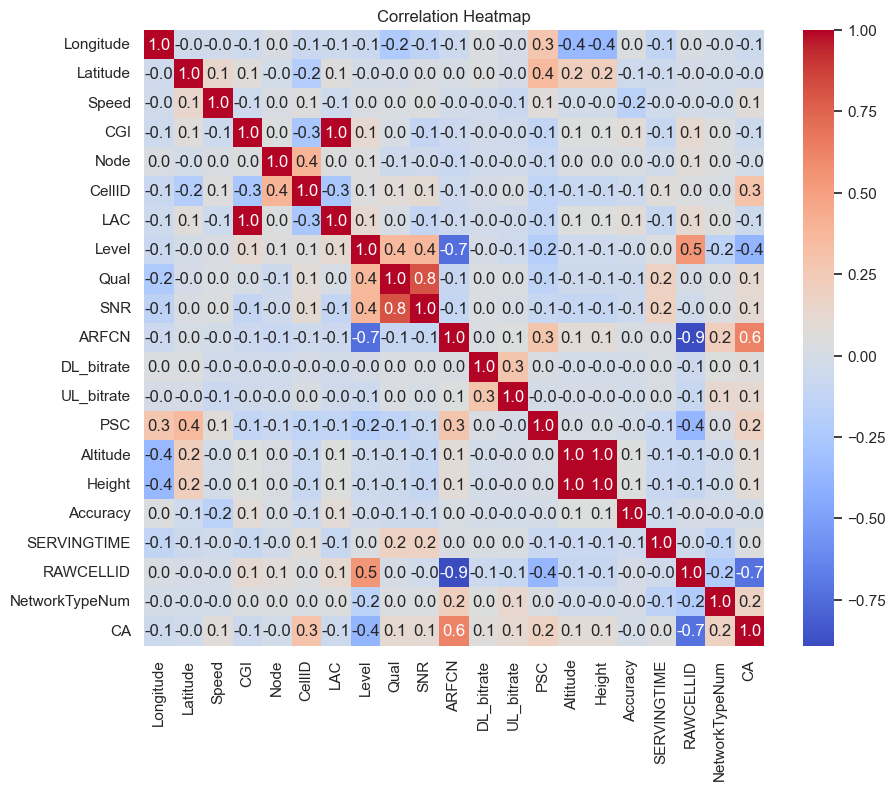

In [76]:
# Creating correlated heatmap for prediction

# Set the style to "dark"
sns.set(style="darkgrid")

# Calculate the correlation matrix
correlation_matrix = df_num.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()

In [77]:
# showing correlation of dependant variables to RSRP (Level)
print("Correlation Matrix of RSRP (Level)")
correlation_matrix["Level"].sort_values(ascending = False)

Correlation Matrix of RSRP (Level)


Level             1.000000
RAWCELLID         0.545507
SNR               0.377307
Qual              0.368402
LAC               0.116489
CGI               0.116489
Node              0.057250
CellID            0.054892
SERVINGTIME       0.037228
Speed             0.019262
DL_bitrate       -0.007116
Latitude         -0.017828
Accuracy         -0.035629
UL_bitrate       -0.051221
Altitude         -0.055820
Height           -0.055820
Longitude        -0.074293
NetworkTypeNum   -0.157284
PSC              -0.195081
CA               -0.385331
ARFCN            -0.739975
Name: Level, dtype: float64

In [78]:
# showing correlation of dependant variables to RSRQ (Qual)
print("Correlation Matrix of RSRQ (Qual)")
correlation_matrix["Qual"].sort_values(ascending = False)

Correlation Matrix of RSRQ (Qual)


Qual              1.000000
SNR               0.810928
Level             0.368402
SERVINGTIME       0.188432
CA                0.113805
CellID            0.086341
NetworkTypeNum    0.032838
DL_bitrate        0.032079
Speed             0.031878
UL_bitrate        0.027811
LAC               0.002658
CGI               0.002658
RAWCELLID         0.001302
Latitude         -0.005305
Accuracy         -0.059183
Node             -0.060693
Altitude         -0.061697
Height           -0.061697
ARFCN            -0.099949
PSC              -0.140785
Longitude        -0.226743
Name: Qual, dtype: float64

In [79]:
#Creating backup copies for the Datasets: RSRP & RSRQ Classification
df15 = df13.copy() #Four Mobile Network Benchmark Dataset
df17 = df13.copy() #Four Mobile Network Benchmark Dataset

In [80]:
# Preprocess the dataframe by getting it ready for modelling

# Onehot-encoding df13: converting all categorical variables to 0s and 1s
df13 = pd.get_dummies(df13)
df13.head()

Longitude   Latitude  Speed  Operatorname  Operator           CGI   Node  \
0  -0.362750  53.770560      2             3     23420  2.342000e+14  50637   
1  -0.362850  53.770448      0             3     23420  2.342000e+14  50637   
2  -0.362850  53.770448      0             3     23420  2.342000e+14  50637   
3  -0.362850  53.770448      0             3     23420  2.342000e+14  50637   
4  -0.362985  53.770405      2             3     23420  2.342000e+14  50637   

   CellID   LAC  Level  ...  NODEHEX_C5CD  LACHEX_1C11  LACHEX_DA1  \
0      72  3489   -115  ...          True        False        True   
1      72  3489   -115  ...          True        False        True   
2      72  3489   -116  ...          True        False        True   
3      72  3489   -113  ...          True        False        True   
4      72  3489   -112  ...          True        False        True   

   DEVICE_samsung:SM-A326B:TP1A.220624.014  BAND_L1  BAND_L20  BAND_L28  \
0                                     True    False     False     False   
1                                     True    False     False     False   
2                                     True     True     False     False   
3                                     True    False     False     False   
4                                     True    False     False     False   

   BAND_L3  BAND_N28  BAND_N48  
0    False     False      True  
1    False     False      True  
2    False     False     False  
3    False     False      True  
4    False     False      True  

[5 rows x 148 columns]

In [81]:
# Viewing the current information in the dataframe
df13.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 0 to 1029
Columns: 148 entries, Longitude to BAND_N48
dtypes: bool(118), float64(4), int32(2), int64(24)
memory usage: 359.7 KB


In [82]:
# Split the data into features (X) and labels (y)
X = df13.drop(['Level'], axis=1) # Adjust the label column name
y = df13['Level'] # Coverage to be predicted

# Splitting the dataframe into training and testing set (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Regularization of the dataframe with standardscaler
scale_train = StandardScaler()
scale_train.fit(X_train)
X_train = scale_train.transform(X_train)
X_test = scale_train.transform(X_test)

In [84]:
# Base Model Training for Coverage (RSRP) prediction

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# K Neighbors Regression
kn = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn.fit(X_train, y_train)
y_pred_kn = kn.predict(X_test)

# Extra Trees Regressor
et_reg = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_reg.fit(X_train, y_train)
y_pred_etreg = et_reg.predict(X_test)

# XGBoost Regression
xg_boost = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xg_boost.fit(X_train, y_train)
y_pred_xg_boost = xg_boost.predict(X_test)

# LightGBM Regression
lightgbm = lgb.LGBMRegressor(random_state=42)
lightgbm.fit(X_train, y_train)
y_pred_lightgbm = lightgbm.predict(X_test)

# GPR Regression
gpr = GaussianProcessRegressor(kernel=RBF() + WhiteKernel(), random_state=42)
gpr.fit(X_train, y_train)
y_pred_gpr = gpr.predict(X_test)

# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# MLP Regression
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# DNN Regression
dnn = Sequential()
dnn.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
dnn.add(Dense(50, activation='relu'))
dnn.add(Dense(1))
dnn.compile(optimizer=Adam(), loss='mse')
dnn.fit(X_train, y_train, epochs=10, batch_size=32)
y_pred_dnn = dnn.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 828
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 33
[LightGBM] [Info] Start training from score -103.420413
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [85]:
# Test and calculate the evaluation metrics

# The Mean Squared Error - All regressors
print("The Mean Squared Error for all the regressors\n")
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_linear))
print("Random Forest Regression MSE:", mean_squared_error(y_test, y_pred_rf))
print("Gradient Boosting Regression MSE:", mean_squared_error(y_test, y_pred_gb))
print("Extra Trees Regression MSE:", mean_squared_error(y_test, y_pred_etreg))
print("Support Vector Regression MSE:", mean_squared_error(y_test, y_pred_svr))
print("Extreme Gradient Boosting Regression MSE:", mean_squared_error(y_test, y_pred_xg_boost))
print("Light Gradient Boosting Machine Regression MSE:", mean_squared_error(y_test, y_pred_lightgbm))
print("Decision Regression MSE:", mean_squared_error(y_test, y_pred_dt))
print("K Neighbors Regression MSE:", mean_squared_error(y_test, y_pred_kn))
print("Multi-Layer Perceptron Regression MSE:", mean_squared_error(y_test, y_pred_mlp))
print("Deep Neural Network Regression MSE:", mean_squared_error(y_test, y_pred_dnn))

The Mean Squared Error for all the regressors

Linear Regression MSE: 21.51285668920989
Random Forest Regression MSE: 23.20588989940669
Gradient Boosting Regression MSE: 22.68621325538656
Extra Trees Regression MSE: 27.525620266990295
Support Vector Regression MSE: 24.559108448899654
Extreme Gradient Boosting Regression MSE: 29.638680958606695
Light Gradient Boosting Machine Regression MSE: 22.409986358459683
Decision Regression MSE: 38.73300970873787
K Neighbors Regression MSE: 50.85967181959602
Multi-Layer Perceptron Regression MSE: 78.3969463960291
Deep Neural Network Regression MSE: 99.40154995515077


In [86]:
# The Root Mean Squared Error - All regressors
print("\n")
print("The Root Mean Squared Error for all the regressors\n")
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_linear, squared=False))
print("Random Forest Regression RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("Gradient Boosting Regression RMSE:", mean_squared_error(y_test, y_pred_gb, squared=False))
print("Extra Trees Regression RMSE:", mean_squared_error(y_test, y_pred_etreg, squared=False))
print("Support Vector Regression RMSE:", mean_squared_error(y_test, y_pred_svr, squared=False))
print("Extreme Gradient Boosting Regression RMSE:", mean_squared_error(y_test, y_pred_xg_boost, squared=False))
print("Light Gradient Boosting Machine Regression RMSE:", mean_squared_error(y_test, y_pred_lightgbm, squared=False))
print("Decision Tree Regression RMSE:", mean_squared_error(y_test, y_pred_dt, squared=False))
print("K Neighbors Regression RMSE:", mean_squared_error(y_test, y_pred_kn, squared=False))
print("Multi-Layer Perceptron Regression RMSE:", mean_squared_error(y_test, y_pred_mlp, squared=False))
print("Deep Neural Network Regression RMSE:", mean_squared_error(y_test, y_pred_dnn, squared=False))



The Root Mean Squared Error for all the regressors

Linear Regression RMSE: 4.638195413003843
Random Forest Regression RMSE: 4.817249204619446
Gradient Boosting Regression RMSE: 4.763004645744801
Extra Trees Regression RMSE: 5.2464864687703425
Support Vector Regression RMSE: 4.955714726343684
Extreme Gradient Boosting Regression RMSE: 5.44414189368781
Light Gradient Boosting Machine Regression RMSE: 4.733918710588479
Decision Tree Regression RMSE: 6.22358495633649
K Neighbors Regression RMSE: 7.131596723006427
Multi-Layer Perceptron Regression RMSE: 8.854205012084885
Deep Neural Network Regression RMSE: 9.970032595490888


In [87]:
# The Mean Absolute Error - All regressors
print("\n")
print("The Mean Absolute Error for all the regressors\n")
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_linear))
print("Random Forest Regression MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Gradient Boosting Regression MAE:", mean_absolute_error(y_test, y_pred_gb))
print("Extra Trees Regression MAE:", mean_absolute_error(y_test, y_pred_etreg))
print("Support Vector Regression MAE:", mean_absolute_error(y_test, y_pred_svr))
print("Extreme Gradient Boosting Regression MAE:", mean_absolute_error(y_test, y_pred_xg_boost))
print("Light Gradient Boosting Machine Regression MAE:", mean_absolute_error(y_test, y_pred_lightgbm))
print("Decision Tree Regression MAE:", mean_absolute_error(y_test, y_pred_dt))
print("K Neighbors Regression MAE:", mean_absolute_error(y_test, y_pred_kn))
print("Multi-Layer Perceptron Regression MAE:", mean_absolute_error(y_test, y_pred_mlp))
print("Deep Neural Network Regression MAE:", mean_absolute_error(y_test, y_pred_dnn))



The Mean Absolute Error for all the regressors

Linear Regression MAE: 3.1858668917217434
Random Forest Regression MAE: 2.9397152103559856
Gradient Boosting Regression MAE: 3.1166762430628254
Extra Trees Regression MAE: 2.8619174757281556
Support Vector Regression MAE: 3.2778144101245488
Extreme Gradient Boosting Regression MAE: 3.1393722978610437
Light Gradient Boosting Machine Regression MAE: 2.9834911058526523
Decision Tree Regression MAE: 3.8689320388349513
K Neighbors Regression MAE: 4.843430379217754
Multi-Layer Perceptron Regression MAE: 4.877264938132282
Deep Neural Network Regression MAE: 6.108529933447977


In [88]:
# MAPE for all regressors
print("\n")
print("\nMean Absolute Percentage Error (MAPE) for all the regressors\n")
print("Linear Regression MAPE:", mean_absolute_percentage_error(y_test, y_pred_linear) * 100)
print("Random Forest Regression MAPE:", mean_absolute_percentage_error(y_test, y_pred_rf) * 100)
print("Gradient Boosting Regression MAPE:", mean_absolute_percentage_error(y_test, y_pred_gb) * 100)
print("Extra Trees Regression MAPE:", mean_absolute_percentage_error(y_test, y_pred_etreg) * 100)
print("Support Vector Regression MAPE:", mean_absolute_percentage_error(y_test, y_pred_svr) * 100)
print("Extreme Gradient Boosting Regression MAPE:", mean_absolute_percentage_error(y_test, y_pred_xg_boost) * 100)
print("Light Gradient Boosting Machine Regression MAPE:", mean_absolute_percentage_error(y_test, y_pred_lightgbm) * 100)
print("Decision Tree Regression MAPE:", mean_absolute_percentage_error(y_test, y_pred_dt) * 100)
print("K Neighbors Regression MAPE:", mean_absolute_percentage_error(y_test, y_pred_kn) * 100)
print("Multi-Layer Perceptron Regression MAPE:", mean_absolute_percentage_error(y_test, y_pred_mlp) * 100)
print("Deep Neural Network Regression MAPE:", mean_absolute_percentage_error(y_test, y_pred_dnn) * 100)




Mean Absolute Percentage Error (MAPE) for all the regressors

Linear Regression MAPE: 3.363092932416847
Random Forest Regression MAPE: 3.1384197374469402
Gradient Boosting Regression MAPE: 3.2766588835047163
Extra Trees Regression MAPE: 3.0911655539557077
Support Vector Regression MAPE: 3.480294342258378
Extreme Gradient Boosting Regression MAPE: 3.4126927243037413
Light Gradient Boosting Machine Regression MAPE: 3.161239369828355
Decision Tree Regression MAPE: 4.109032324146528
K Neighbors Regression MAPE: 5.056665427510552
Multi-Layer Perceptron Regression MAPE: 4.947053967616724
Deep Neural Network Regression MAPE: 6.2223034042665555


In [89]:
# The coefficient of determination - All regressors
print("\n")
print("Coefficient of determination for all the regressors\n")
print("Linear Regression R2:", r2_score(y_test, y_pred_linear))
print("Random Forest Regression R2:", r2_score(y_test, y_pred_rf))
print("Gradient Boosting Regression R2:", r2_score(y_test, y_pred_gb))
print("Extra Trees Regression R2:", r2_score(y_test, y_pred_etreg))
print("Support Vector Regression R2:", r2_score(y_test, y_pred_svr))
print("Extreme Gradient Boosting Regression R2:", r2_score(y_test, y_pred_xg_boost))
print("Light Gradient Boosting Machine Regression R2:", r2_score(y_test, y_pred_lightgbm))
print("Decision Tree Regression R2:", r2_score(y_test, y_pred_dt))
print("K Neighbors Regression R2:", r2_score(y_test, y_pred_kn))
print("Multi-Layer Perceptron Regression R2:", r2_score(y_test, y_pred_mlp))
print("Deep Neural Network Regression R2:", r2_score(y_test, y_pred_dnn))



Coefficient of determination for all the regressors

Linear Regression R2: 0.8798943784613745
Random Forest Regression R2: 0.8704422257819857
Gradient Boosting Regression R2: 0.8733435646060598
Extra Trees Regression R2: 0.8463253031355328
Support Vector Regression R2: 0.8628872479697658
Extreme Gradient Boosting Regression R2: 0.8345281498619408
Light Gradient Boosting Machine Regression R2: 0.8748857309310801
Decision Tree Regression R2: 0.7837547903406576
K Neighbors Regression R2: 0.7160520063238777
Multi-Layer Perceptron Regression R2: 0.562312243805906
Deep Neural Network Regression R2: 0.4450441839621351


In [90]:
# Ensemble Learning Modelling with Cross-Validation --- Mean Squared Error (MSE)

# Importing the required libraries
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# Define ensemble (Voting Regressor)
ensemble_4operators = VotingRegressor(estimators=[('rf', rf), ('gb', gb), ('et', et_reg), ('svr', svr), 
                                                  ('xg_boost', xg_boost), ('lightgbm', lightgbm)])                                                  

# Perform k-fold cross-validation for the ensemble using negative MSE
k = 10  # Number of folds for cross-validation
scores = cross_val_score(ensemble_4operators, X_train, y_train, cv=k, scoring='neg_mean_squared_error')

# Calculate MSE from the negative MSE scores
mse_scores = -scores

print("Ensemble (Voting Regressor)")
print(f"Cross-Validation MSE: {mse_scores}")
print(f"Mean MSE: {mse_scores.mean()}")
print(f"Standard Deviation of MSE: {mse_scores.std()}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 740, number of used features: 33
[LightGBM] [Info] Start training from score -103.301351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [91]:
# Ensemble Learning Modelling with Cross-Validation --- RMSE (Root Mean Squared Error)

# Define ensemble (Voting Regressor)
ensemble_4operators = VotingRegressor(estimators=[('rf', rf), ('gb', gb), ('et', et_reg), ('svr', svr), 
                                                  ('xg_boost', xg_boost), ('lightgbm', lightgbm)])                                                  

# Perform k-fold cross-validation for the ensemble
k = 10  # Number of folds for cross-validation

# Scoring with negative mean squared error (to get positive RMSE)
scores = cross_val_score(ensemble_4operators, X_train, y_train, cv=k, scoring='neg_mean_squared_error')

# Calculate RMSE from the negative MSE
rmse_scores = np.sqrt(-scores)

print("Ensemble (Voting Regressor)")
print(f"Cross-Validation RMSE: {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean()}")
print(f"Standard Deviation of RMSE: {rmse_scores.std()}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 740, number of used features: 33
[LightGBM] [Info] Start training from score -103.301351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [92]:
# Ensemble Learning Modelling with Cross-Validation --- Mean Absolute Error (MAE)

# Define ensemble (Voting Regressor)
ensemble_4operators = VotingRegressor(estimators=[('rf', rf), ('gb', gb), ('et', et_reg), ('svr', svr), 
                                                  ('xg_boost', xg_boost), ('lightgbm', lightgbm)])                                                

# Perform k-fold cross-validation for the ensemble using negative MAE
k = 10  # Number of folds for cross-validation
scores = cross_val_score(ensemble_4operators, X_train, y_train, cv=k, scoring='neg_mean_absolute_error')

# Calculate MAE from the negative MAE scores
mae_scores = -scores

print("Ensemble (Voting Regressor)")
print(f"Cross-Validation MAE: {mae_scores}")
print(f"Mean MAE: {mae_scores.mean()}")
print(f"Standard Deviation of MAE: {mae_scores.std()}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 740, number of used features: 33
[LightGBM] [Info] Start training from score -103.301351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [93]:
#MAPE Ensemble

# Define ensemble (Voting Regressor)
ensemble_4operators = VotingRegressor(estimators=[('rf', rf), ('gb', gb), ('et', et_reg), 
                                                  ('svr', svr), ('xg_boost', xg_boost), ('lightgbm', lightgbm)])

k = 10  # Number of folds for cross-validation

# Define the MAPE scorer
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Perform cross-validation using MAPE as the scoring metric
mape_scores = cross_val_score(ensemble_4operators, X_train, y_train, cv=k, scoring=mape_scorer)

# Since MAPE is returned as a negative value, we negate it to get the actual MAPE
mape_scores = -mape_scores

# Print the results
print("Ensemble (Voting Regressor) with Cross-Validation")
print(f"Mean MAPE: {mape_scores.mean() * 100:.2f}%")
print(f"Standard Deviation of MAPE: {mape_scores.std() * 100:.2f}%")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 740, number of used features: 33
[LightGBM] [Info] Start training from score -103.301351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [94]:
# Ensemble Learning Modelling with Cross-Validation -- R-squared (Coefficient of Determination)

# Define ensemble (Voting Regressor)
ensemble_4operators = VotingRegressor(estimators=[('rf', rf), ('gb', gb), ('et', et_reg), ('svr', svr), 
                                                  ('xg_boost', xg_boost), ('lightgbm', lightgbm)])

# Perform k-fold cross-validation for the ensemble using R-squared as the scoring metric
k = 10  # Number of folds for cross-validation

# Define a custom scorer for R-squared
def r2_scorer(y, y_pred):
    ss_res = ((y - y_pred) ** 2).sum()
    ss_tot = ((y - y.mean()) ** 2).sum()
    r2 = 1 - (ss_res / ss_tot)
    return r2

r2 = make_scorer(r2_scorer)

# Use the custom R-squared scorer for cross-validation
scores = cross_val_score(ensemble_4operators, X_train, y_train, cv=k, scoring=r2)

print("Ensemble (Voting Regressor)")
print(f"Cross-Validation R-squared: {scores}")
print(f"Mean R-squared: {scores.mean()}")
print(f"Standard Deviation of R-squared: {scores.std()}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 740, number of used features: 33
[LightGBM] [Info] Start training from score -103.301351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

## Quality || RSRQ (dB) Regression Prediction

### FOUR NETWORK OPERATORS (Three, EE, O2 & Vodafone) - RSRQ (dB) REGRESSION PREDICTION

In [95]:
# Split the data into features (X) and labels (y)
X = df13.drop(['Qual'], axis=1) # Adjust the label column name
y = df13['Qual'] # Quality to be predicted

# Splitting the dataframe into training and testing set (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Regularization of the dataframe with standardscaler
scale_train = StandardScaler()
scale_train.fit(X_train)
X_train = scale_train.transform(X_train)
X_test = scale_train.transform(X_test)

In [97]:
# Base Model Training for Coverage (RSRP) prediction

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# K Neighbors Regression
kn = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn.fit(X_train, y_train)
y_pred_kn = kn.predict(X_test)

# Extra Trees Regressor
et_reg = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_reg.fit(X_train, y_train)
y_pred_etreg = et_reg.predict(X_test)

# XGBoost Regression
xg_boost = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xg_boost.fit(X_train, y_train)
y_pred_xg_boost = xg_boost.predict(X_test)

# LightGBM Regression
lightgbm = lgb.LGBMRegressor(random_state=42)
lightgbm.fit(X_train, y_train)
y_pred_lightgbm = lightgbm.predict(X_test)

# GPR Regression
gpr = GaussianProcessRegressor(kernel=RBF() + WhiteKernel(), random_state=42)
gpr.fit(X_train, y_train)
y_pred_gpr = gpr.predict(X_test)

# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# MLP Regression
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# DNN Regression
dnn = Sequential()
dnn.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
dnn.add(Dense(50, activation='relu'))
dnn.add(Dense(1))
dnn.compile(optimizer=Adam(), loss='mse')
dnn.fit(X_train, y_train, epochs=10, batch_size=32)
y_pred_dnn = dnn.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 872
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 33
[LightGBM] [Info] Start training from score -13.754557
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 133.6112
Epo

In [98]:
# Test and calculate the evaluation metrics

# The Mean Squared Error - All regressors
print("The Mean Squared Error for all the regressors\n")
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_linear))
print("Random Forest Regression MSE:", mean_squared_error(y_test, y_pred_rf))
print("Gradient Boosting Regression MSE:", mean_squared_error(y_test, y_pred_gb))
print("Extra Trees Regression MSE:", mean_squared_error(y_test, y_pred_etreg))
print("Support Vector Regression MSE:", mean_squared_error(y_test, y_pred_svr))
print("Extreme Gradient Boosting Regression MSE:", mean_squared_error(y_test, y_pred_xg_boost))
print("Light Gradient Boosting Machine Regression MSE:", mean_squared_error(y_test, y_pred_lightgbm))
print("Decision Regression MSE:", mean_squared_error(y_test, y_pred_dt))
print("K Neighbors Regression MSE:", mean_squared_error(y_test, y_pred_kn))
print("Multi-Layer Perceptron Regression MSE:", mean_squared_error(y_test, y_pred_mlp))
print("Deep Neural Network Regression MSE:", mean_squared_error(y_test, y_pred_dnn))

The Mean Squared Error for all the regressors

Linear Regression MSE: 1.485320226387748
Random Forest Regression MSE: 0.7644368932038834
Gradient Boosting Regression MSE: 0.9213419735076458
Extra Trees Regression MSE: 0.8368961165048544
Support Vector Regression MSE: 1.7730642559138337
Extreme Gradient Boosting Regression MSE: 0.8494895495558948
Light Gradient Boosting Machine Regression MSE: 0.9004208189079408
Decision Regression MSE: 1.3203883495145632
K Neighbors Regression MSE: 2.7630573605203486
Multi-Layer Perceptron Regression MSE: 1.8507284426627806
Deep Neural Network Regression MSE: 1.9018741130584098


In [99]:
# The Root Mean Squared Error - All regressors
print("\n")
print("The Root Mean Squared Error for all the regressors\n")
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_linear, squared=False))
print("Random Forest Regression RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("Gradient Boosting Regression RMSE:", mean_squared_error(y_test, y_pred_gb, squared=False))
print("Extra Trees Regression RMSE:", mean_squared_error(y_test, y_pred_etreg, squared=False))
print("Support Vector Regression RMSE:", mean_squared_error(y_test, y_pred_svr, squared=False))
print("Extreme Gradient Boosting Regression RMSE:", mean_squared_error(y_test, y_pred_xg_boost, squared=False))
print("Light Gradient Boosting Machine Regression RMSE:", mean_squared_error(y_test, y_pred_lightgbm, squared=False))
print("Decision Tree Regression RMSE:", mean_squared_error(y_test, y_pred_dt, squared=False))
print("K Neighbors Regression RMSE:", mean_squared_error(y_test, y_pred_kn, squared=False))
print("Multi-Layer Perceptron Regression RMSE:", mean_squared_error(y_test, y_pred_mlp, squared=False))
print("Deep Neural Network Regression RMSE:", mean_squared_error(y_test, y_pred_dnn, squared=False))



The Root Mean Squared Error for all the regressors

Linear Regression RMSE: 1.2187371440912713
Random Forest Regression RMSE: 0.8743208182377241
Gradient Boosting Regression RMSE: 0.95986560179415
Extra Trees Regression RMSE: 0.9148202645901841
Support Vector Regression RMSE: 1.3315645894637758
Extreme Gradient Boosting Regression RMSE: 0.9216775735342023
Light Gradient Boosting Machine Regression RMSE: 0.9489050631690932
Decision Tree Regression RMSE: 1.1490815243117274
K Neighbors Regression RMSE: 1.6622446752871096
Multi-Layer Perceptron Regression RMSE: 1.3604148053673852
Deep Neural Network Regression RMSE: 1.379084519911093


In [100]:
# The Mean Absolute Error - All regressors
print("\n")
print("The Mean Absolute Error for all the regressors\n")
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_linear))
print("Random Forest Regression MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Gradient Boosting Regression MAE:", mean_absolute_error(y_test, y_pred_gb))
print("Extra Trees Regression MAE:", mean_absolute_error(y_test, y_pred_etreg))
print("Support Vector Regression MAE:", mean_absolute_error(y_test, y_pred_svr))
print("Extreme Gradient Boosting Regression MAE:", mean_absolute_error(y_test, y_pred_xg_boost))
print("Light Gradient Boosting Machine Regression MAE:", mean_absolute_error(y_test, y_pred_lightgbm))
print("Decision Tree Regression MAE:", mean_absolute_error(y_test, y_pred_dt))
print("K Neighbors Regression MAE:", mean_absolute_error(y_test, y_pred_kn))
print("Multi-Layer Perceptron Regression MAE:", mean_absolute_error(y_test, y_pred_mlp))
print("Deep Neural Network Regression MAE:", mean_absolute_error(y_test, y_pred_dnn))



The Mean Absolute Error for all the regressors

Linear Regression MAE: 0.8912858775722251
Random Forest Regression MAE: 0.5863106796116505
Gradient Boosting Regression MAE: 0.6589852302759618
Extra Trees Regression MAE: 0.5997087378640775
Support Vector Regression MAE: 0.942281719451745
Extreme Gradient Boosting Regression MAE: 0.6389408852290182
Light Gradient Boosting Machine Regression MAE: 0.6461087535843585
Decision Tree Regression MAE: 0.7475728155339806
K Neighbors Regression MAE: 1.129532614752976
Multi-Layer Perceptron Regression MAE: 0.8491899054627938
Deep Neural Network Regression MAE: 0.9545340445435163


In [101]:
# MAPE for all regressors
print("\n")
print("\nMean Absolute Percentage Error (MAPE) for all the regressors\n")
print("Linear Regression MAPE:", mean_absolute_percentage_error(y_test, y_pred_linear) * 100)
print("Random Forest Regression MAPE:", mean_absolute_percentage_error(y_test, y_pred_rf) * 100)
print("Gradient Boosting Regression MAPE:", mean_absolute_percentage_error(y_test, y_pred_gb) * 100)
print("Extra Trees Regression MAPE:", mean_absolute_percentage_error(y_test, y_pred_etreg) * 100)
print("Support Vector Regression MAPE:", mean_absolute_percentage_error(y_test, y_pred_svr) * 100)
print("Extreme Gradient Boosting Regression MAPE:", mean_absolute_percentage_error(y_test, y_pred_xg_boost) * 100)
print("Light Gradient Boosting Machine Regression MAPE:", mean_absolute_percentage_error(y_test, y_pred_lightgbm) * 100)
print("Decision Tree Regression MAPE:", mean_absolute_percentage_error(y_test, y_pred_dt) * 100)
print("K Neighbors Regression MAPE:", mean_absolute_percentage_error(y_test, y_pred_kn) * 100)
print("Multi-Layer Perceptron Regression MAPE:", mean_absolute_percentage_error(y_test, y_pred_mlp) * 100)
print("Deep Neural Network Regression MAPE:", mean_absolute_percentage_error(y_test, y_pred_dnn) * 100)




Mean Absolute Percentage Error (MAPE) for all the regressors

Linear Regression MAPE: 6.214785400517031
Random Forest Regression MAPE: 3.964417785679508
Gradient Boosting Regression MAPE: 4.448289692043696
Extra Trees Regression MAPE: 4.014468961580197
Support Vector Regression MAPE: 6.500505708151712
Extreme Gradient Boosting Regression MAPE: 4.397836808709453
Light Gradient Boosting Machine Regression MAPE: 4.394796095035089
Decision Tree Regression MAPE: 5.030588095547216
K Neighbors Regression MAPE: 7.611873757689522
Multi-Layer Perceptron Regression MAPE: 6.003426901342867
Deep Neural Network Regression MAPE: 6.748173962749212


In [102]:
# The coefficient of determination - All regressors
print("\n")
print("Coefficient of determination for all the regressors\n")
print("Linear Regression R2:", r2_score(y_test, y_pred_linear))
print("Random Forest Regression R2:", r2_score(y_test, y_pred_rf))
print("Gradient Boosting Regression R2:", r2_score(y_test, y_pred_gb))
print("Extra Trees Regression R2:", r2_score(y_test, y_pred_etreg))
print("Support Vector Regression R2:", r2_score(y_test, y_pred_svr))
print("Extreme Gradient Boosting Regression R2:", r2_score(y_test, y_pred_xg_boost))
print("Light Gradient Boosting Machine Regression R2:", r2_score(y_test, y_pred_lightgbm))
print("Decision Tree Regression R2:", r2_score(y_test, y_pred_dt))
print("K Neighbors Regression R2:", r2_score(y_test, y_pred_kn))
print("Multi-Layer Perceptron Regression R2:", r2_score(y_test, y_pred_mlp))
print("Deep Neural Network Regression R2:", r2_score(y_test, y_pred_dnn))



Coefficient of determination for all the regressors

Linear Regression R2: 0.7089280476984756
Random Forest Regression R2: 0.8501965199401518
Gradient Boosting Regression R2: 0.8194484918458242
Extra Trees Regression R2: 0.8359969909673606
Support Vector Regression R2: 0.6525400614923276
Extreme Gradient Boosting Regression R2: 0.8335291089044741
Light Gradient Boosting Machine Regression R2: 0.8235483224450127
Decision Tree Regression R2: 0.7412490533276687
K Neighbors Regression R2: 0.45853528016402123
Multi-Layer Perceptron Regression R2: 0.6373205377429587
Deep Neural Network Regression R2: 0.6272977360135088


In [103]:
# Ensemble Learning Modelling with Cross-Validation --- Mean Squared Error (MSE)

# Define ensemble (Voting Regressor)
ensemble_4operators = VotingRegressor(estimators=[('rf', rf), ('gb', gb), ('et', et_reg), ('svr', svr), 
                                                  ('xg_boost', xg_boost), ('lightgbm', lightgbm)])                                                  

# Perform k-fold cross-validation for the ensemble using negative MSE
k = 10  # Number of folds for cross-validation
scores = cross_val_score(ensemble_4operators, X_train, y_train, cv=k, scoring='neg_mean_squared_error')

# Calculate MSE from the negative MSE scores
mse_scores = -scores

print("Ensemble (Voting Regressor)")
print(f"Cross-Validation MSE: {mse_scores}")
print(f"Mean MSE: {mse_scores.mean()}")
print(f"Standard Deviation of MSE: {mse_scores.std()}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000839 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 740, number of used features: 33
[LightGBM] [Info] Start training from score -13.764865
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [104]:
# Ensemble Learning Modelling with Cross-Validation --- RMSE (Root Mean Squared Error)

# Define ensemble (Voting Regressor)
ensemble_4operators = VotingRegressor(estimators=[('rf', rf), ('gb', gb), ('et', et_reg), ('svr', svr), 
                                                  ('xg_boost', xg_boost), ('lightgbm', lightgbm)])                                                  

# Perform k-fold cross-validation for the ensemble
k = 10  # Number of folds for cross-validation

# Scoring with negative mean squared error (to get positive RMSE)
scores = cross_val_score(ensemble_4operators, X_train, y_train, cv=k, scoring='neg_mean_squared_error')

# Calculate RMSE from the negative MSE
rmse_scores = np.sqrt(-scores)

print("Ensemble (Voting Regressor)")
print(f"Cross-Validation RMSE: {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean()}")
print(f"Standard Deviation of RMSE: {rmse_scores.std()}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 740, number of used features: 33
[LightGBM] [Info] Start training from score -13.764865
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [105]:
# Ensemble Learning Modelling with Cross-Validation --- Mean Absolute Error (MAE)

# Define ensemble (Voting Regressor)
ensemble_4operators = VotingRegressor(estimators=[('rf', rf), ('gb', gb), ('et', et_reg), ('svr', svr), 
                                                  ('xg_boost', xg_boost), ('lightgbm', lightgbm)])

# Perform k-fold cross-validation for the ensemble using negative MAE
k = 10  # Number of folds for cross-validation
scores = cross_val_score(ensemble_4operators, X_train, y_train, cv=k, scoring='neg_mean_absolute_error')

# Calculate MAE from the negative MAE scores
mae_scores = -scores

print("Ensemble (Voting Regressor)")
print(f"Cross-Validation MAE: {mae_scores}")
print(f"Mean MAE: {mae_scores.mean()}")
print(f"Standard Deviation of MAE: {mae_scores.std()}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 740, number of used features: 33
[LightGBM] [Info] Start training from score -13.764865
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [106]:
#MAPE Ensemble

# Define ensemble (Voting Regressor)
ensemble_4operators = VotingRegressor(estimators=[('rf', rf), ('gb', gb), ('et', et_reg), 
                                                  ('svr', svr), ('xg_boost', xg_boost), ('lightgbm', lightgbm)])

k = 10  # Number of folds for cross-validation

# Define the MAPE scorer
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Perform cross-validation using MAPE as the scoring metric
mape_scores = cross_val_score(ensemble_4operators, X_train, y_train, cv=k, scoring=mape_scorer)

# Since MAPE is returned as a negative value, we negate it to get the actual MAPE
mape_scores = -mape_scores

# Print the results
print("Ensemble (Voting Regressor) with Cross-Validation")
print(f"Mean MAPE: {mape_scores.mean() * 100:.2f}%")
print(f"Standard Deviation of MAPE: {mape_scores.std() * 100:.2f}%")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 740, number of used features: 33
[LightGBM] [Info] Start training from score -13.764865
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [107]:
#Ensemble Learning Modelling with Cross-Validation -- R-squared (Coefficient of Determination)

# Define ensemble (Voting Regressor)
ensemble_4operators = VotingRegressor(estimators=[('rf', rf), ('gb', gb), ('et', et_reg), ('svr', svr), 
                                                  ('xg_boost', xg_boost), ('lightgbm', lightgbm)])

# Perform k-fold cross-validation for the ensemble using R-squared as the scoring metric
k = 10  # Number of folds for cross-validation

# Define a custom scorer for R-squared
def r2_scorer(y, y_pred):
    ss_res = ((y - y_pred) ** 2).sum()
    ss_tot = ((y - y.mean()) ** 2).sum()
    r2 = 1 - (ss_res / ss_tot)
    return r2

r2 = make_scorer(r2_scorer)

# Use the custom R-squared scorer for cross-validation
scores = cross_val_score(ensemble_4operators, X_train, y_train, cv=k, scoring=r2)

print("Ensemble (Voting Regressor)")
print(f"Cross-Validation R-squared: {scores}")
print(f"Mean R-squared: {scores.mean()}")
print(f"Standard Deviation of R-squared: {scores.std()}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 740, number of used features: 33
[LightGBM] [Info] Start training from score -13.764865
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

## CLASSIFICATION

## Coverage || RSRP (dBm) Prediction by Classification

### RSRP Prediction || FOUR MOBILE NETWORK OPERATORS (3, EE, TESCO (O2), & Vodafone)

In [108]:
# Importing necessary libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense

In [109]:
# Preprocess the dataframe by getting it ready for modelling

# Onehot-encoding df15: converting all categorical variables to 0s and 1s
df15 = pd.get_dummies(df13)
df15.head()

Longitude   Latitude  Speed  Operatorname  Operator           CGI   Node  \
0  -0.362750  53.770560      2             3     23420  2.342000e+14  50637   
1  -0.362850  53.770448      0             3     23420  2.342000e+14  50637   
2  -0.362850  53.770448      0             3     23420  2.342000e+14  50637   
3  -0.362850  53.770448      0             3     23420  2.342000e+14  50637   
4  -0.362985  53.770405      2             3     23420  2.342000e+14  50637   

   CellID   LAC  Level  ...  NODEHEX_C5CD  LACHEX_1C11  LACHEX_DA1  \
0      72  3489   -115  ...          True        False        True   
1      72  3489   -115  ...          True        False        True   
2      72  3489   -116  ...          True        False        True   
3      72  3489   -113  ...          True        False        True   
4      72  3489   -112  ...          True        False        True   

   DEVICE_samsung:SM-A326B:TP1A.220624.014  BAND_L1  BAND_L20  BAND_L28  \
0                                     True    False     False     False   
1                                     True    False     False     False   
2                                     True     True     False     False   
3                                     True    False     False     False   
4                                     True    False     False     False   

   BAND_L3  BAND_N28  BAND_N48  
0    False     False      True  
1    False     False      True  
2    False     False     False  
3    False     False      True  
4    False     False      True  

[5 rows x 148 columns]

In [110]:
# Creating RSRP Classes for Classification

# Replace values in 'Level' column based on specified conditions
df15['Level'] = np.where(df15['Level'] >= -75, 'Excellent', 
                np.where((df15['Level'] >= -95) & (df15['Level'] < -75), 'Good',
                np.where((df15['Level'] >= -115) & (df15['Level'] < -95), 'Fair', 'Bad')))

In [111]:
# Validating changes made to see the new RSRP categorical entries for prediction
df15["Level"].unique()

array(['Fair', 'Bad', 'Good', 'Excellent'], dtype=object)

In [112]:
# Checking for duplicates in the dataframe
df15.duplicated().sum()

1

In [113]:
# Removing duplicates
df15.drop_duplicates(inplace=True)

In [114]:
# Validating changes
df15.duplicated().sum()

0

In [115]:
# Viewing information in the dataframe
df15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1029
Columns: 148 entries, Longitude to BAND_N48
dtypes: bool(118), float64(4), int32(2), int64(23), object(1)
memory usage: 359.4+ KB


In [116]:
# Viewing rows and columns
df15

Longitude   Latitude  Speed  Operatorname  Operator           CGI  \
0     -0.362750  53.770560      2             3     23420  2.342000e+14   
1     -0.362850  53.770448      0             3     23420  2.342000e+14   
2     -0.362850  53.770448      0             3     23420  2.342000e+14   
3     -0.362850  53.770448      0             3     23420  2.342000e+14   
4     -0.362985  53.770405      2             3     23420  2.342000e+14   
...         ...        ...    ...           ...       ...           ...   
1025  -0.366692  53.770570      4             3     23420  2.342000e+14   
1026  -0.366527  53.770538      3             3     23420  2.342000e+14   
1027  -0.366355  53.770547      3             3     23420  2.342000e+14   
1028  -0.366197  53.770507      3             3     23420  2.342000e+14   
1029  -0.366197  53.770507      3             3     23420  2.342000e+14   

       Node  CellID   LAC Level  ...  NODEHEX_C5CD  LACHEX_1C11  LACHEX_DA1  \
0     50637      72  3489  Fair  ...          True        False        True   
1     50637      72  3489  Fair  ...          True        False        True   
2     50637      72  3489   Bad  ...          True        False        True   
3     50637      72  3489  Fair  ...          True        False        True   
4     50637      72  3489  Fair  ...          True        False        True   
...     ...     ...   ...   ...  ...           ...          ...         ...   
1025  50637      72  3489  Fair  ...          True        False        True   
1026  50637      72  3489  Fair  ...          True        False        True   
1027  50637      72  3489  Fair  ...          True        False        True   
1028  50637      72  3489  Fair  ...          True        False        True   
1029  50637      72  3489  Fair  ...          True        False        True   

      DEVICE_samsung:SM-A326B:TP1A.220624.014  BAND_L1  BAND_L20  BAND_L28  \
0                                        True    False     False     False   
1                                        True    False     False     False   
2                                        True     True     False     False   
3                                        True    False     False     False   
4                                        True    False     False     False   
...                                       ...      ...       ...       ...   
1025                                     True    False     False     False   
1026                                     True    False     False     False   
1027                                     True    False     False     False   
1028                                     True    False     False     False   
1029                                     True    False     False     False   

      BAND_L3  BAND_N28  BAND_N48  
0       False     False      True  
1       False     False      True  
2       False     False     False  
3       False     False      True  
4       False     False      True  
...       ...       ...       ...  
1025    False     False      True  
1026    False     False      True  
1027    False     False      True  
1028    False     False      True  
1029    False     False      True  

[1028 rows x 148 columns]

In [117]:
# Split the data into features (X) and labels (y)
X = df15.drop('Level', axis=1)  # Adjust the label column name
y = df15['Level'] # Coverage to be predicted

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
# Regularization of the dataframe with standardscaler
scale_train = StandardScaler()
scale_train.fit(X_train)
X_train = scale_train.transform(X_train)
X_test = scale_train.transform(X_test)

In [119]:
# Initialize and train the classification base models for prediction

# Initialize models
logistic_regression = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier(n_neighbors=5)
gradient_boosting = GradientBoostingClassifier()
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)  # Initialize MLP
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier()
extra_trees = ExtraTreesClassifier()

#Train Models
logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
mlp.fit(X_train, y_train)  # Fit MLP
naive_bayes.fit(X_train, y_train)
# xgboost_classifier.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
extra_trees.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lr = logistic_regression.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_gb = gradient_boosting.predict(X_test)
y_pred_mlp = mlp.predict(X_test)  # MLP prediction
y_pred_nb = naive_bayes.predict(X_test)
# y_pred_xgb = xgboost_classifier.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)
y_pred_et = extra_trees.predict(X_test)
# y_pred_dnn = dnn.predict_classes(X_test)  # DNN prediction

In [120]:
# Evaluate the models -- Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Multi-Layer Perceptron Classifier Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Gaussian Naive Bayes Classifier Accuracy:", accuracy_score(y_test, y_pred_nb))
# print("Extreme Gradient Boost Classifier Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Extra Trees Classifier Accuracy:", accuracy_score(y_test, y_pred_et))

Logistic Regression Accuracy: 0.8446601941747572
Random Forest Classifier Accuracy: 0.8252427184466019
SVM Accuracy: 0.8058252427184466
K-Nearest Neighbors Accuracy: 0.6699029126213593
Gradient Boosting Classifier Accuracy: 0.8252427184466019
Multi-Layer Perceptron Classifier Accuracy: 0.8009708737864077
Gaussian Naive Bayes Classifier Accuracy: 0.46116504854368934
Decision Tree Classifier Accuracy: 0.7621359223300971
Extra Trees Classifier Accuracy: 0.8155339805825242


In [121]:
from sklearn.metrics import roc_auc_score

# Logistic Regression
y_pred_prob_lr = logistic_regression.predict_proba(X_test)
print("Logistic Regression ROC AUC:", roc_auc_score(y_test, y_pred_prob_lr, multi_class='ovr'))

# Random Forest Classifier
y_pred_prob_rf = random_forest.predict_proba(X_test)
print("Random Forest Classifier ROC AUC:", roc_auc_score(y_test, y_pred_prob_rf, multi_class='ovr'))

# SVM
svm_roc = SVC(probability=True)
svm_roc.fit(X_train, y_train)
y_pred_prob_svm = svm_roc.predict_proba(X_test)
print("SVM ROC AUC:", roc_auc_score(y_test, y_pred_prob_svm, multi_class='ovr'))

# K-Nearest Neighbors
y_pred_prob_knn = knn.predict_proba(X_test)
print("K-Nearest Neighbors ROC AUC:", roc_auc_score(y_test, y_pred_prob_knn, multi_class='ovr'))

# Gradient Boosting Classifier
y_pred_prob_gb = gradient_boosting.predict_proba(X_test)
print("Gradient Boosting Classifier ROC AUC:", roc_auc_score(y_test, y_pred_prob_gb, multi_class='ovr'))

# Multi-Layer Perceptron Classifier
y_pred_prob_mlp = mlp.predict_proba(X_test)
print("Multi-Layer Perceptron Classifier ROC AUC:", roc_auc_score(y_test, y_pred_prob_mlp, multi_class='ovr'))

# Gaussian Naive Bayes Classifier
y_pred_prob_nb = naive_bayes.predict_proba(X_test)
print("Gaussian Naive Bayes Classifier ROC AUC:", roc_auc_score(y_test, y_pred_prob_nb, multi_class='ovr'))

# Decision Tree Classifier
y_pred_prob_dt = decision_tree.predict_proba(X_test)
print("Decision Tree Classifier ROC AUC:", roc_auc_score(y_test, y_pred_prob_dt, multi_class='ovr'))

# Extra Trees Classifier
y_pred_prob_et = extra_trees.predict_proba(X_test)
print("Extra Trees Classifier ROC AUC:", roc_auc_score(y_test, y_pred_prob_et, multi_class='ovr'))


Logistic Regression ROC AUC: 0.9384410551179008
Random Forest Classifier ROC AUC: 0.939125353223732
SVM ROC AUC: 0.9313749305502292
K-Nearest Neighbors ROC AUC: 0.8289567048232065
Gradient Boosting Classifier ROC AUC: 0.9336599856213467
Multi-Layer Perceptron Classifier ROC AUC: 0.9361040529277005
Gaussian Naive Bayes Classifier ROC AUC: 0.781666939127161
Decision Tree Classifier ROC AUC: 0.8145242100126586
Extra Trees Classifier ROC AUC: 0.9361167998254721


In [122]:
# Print detailed classification reports
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("\nRandom Forest Classifier Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("\nK-Nearest Neighbors Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\nGradient Boosting Classifier Classification Report:\n", classification_report(y_test, y_pred_gb))
print("\nMulti-Layer Perceptron Classifier Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("\nGaussian Naive Bayes Classifier Classification Report:\n", classification_report(y_test, y_pred_nb))
# print("\nExtreme Gradient Boost Classifier Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nDecision Tree Classifier Classification Report:\n", classification_report(y_test, y_pred_dt))
print("\nExtra Trees Classifier Classification Report:\n", classification_report(y_test, y_pred_et))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

         Bad       0.77      0.64      0.70        36
   Excellent       0.60      0.60      0.60         5
        Fair       0.87      0.89      0.88       123
        Good       0.84      0.90      0.87        42

    accuracy                           0.84       206
   macro avg       0.77      0.76      0.76       206
weighted avg       0.84      0.84      0.84       206


Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

         Bad       0.78      0.50      0.61        36
   Excellent       0.75      0.60      0.67         5
        Fair       0.84      0.89      0.87       123
        Good       0.80      0.95      0.87        42

    accuracy                           0.83       206
   macro avg       0.79      0.73      0.75       206
weighted avg       0.82      0.83      0.82       206


SVM Classification Report:
       

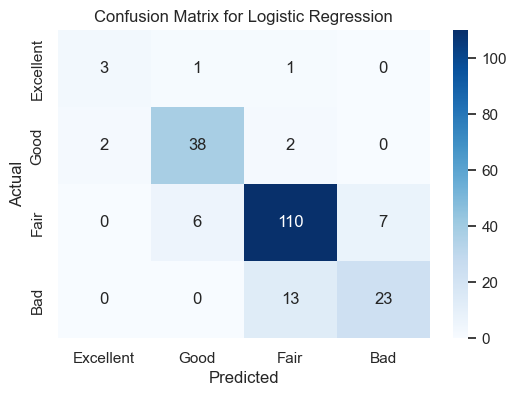

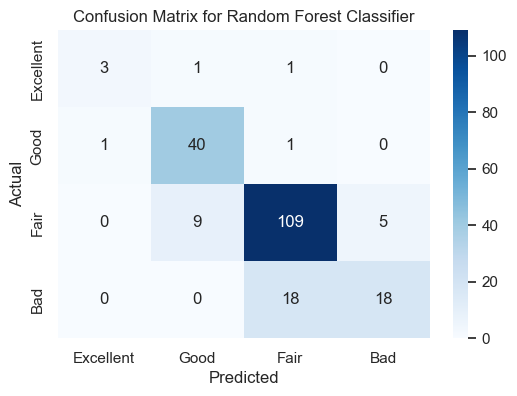

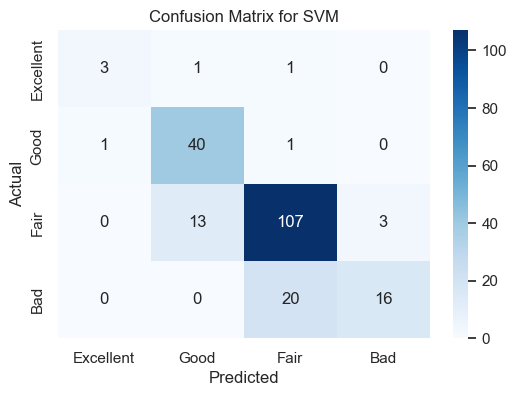

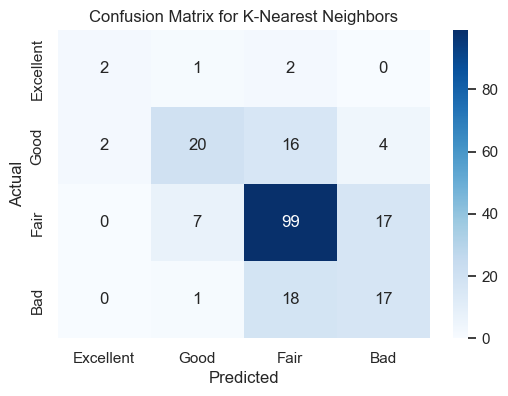

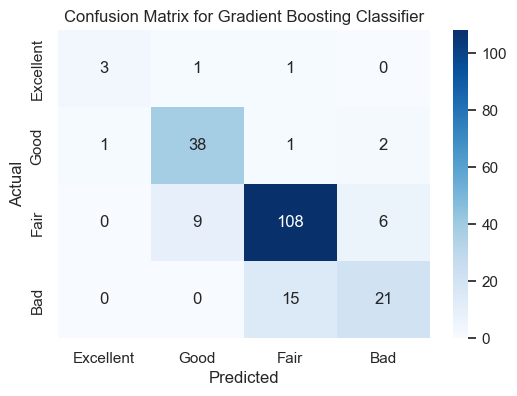

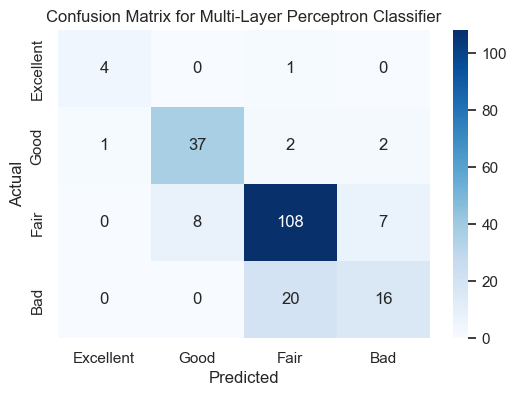

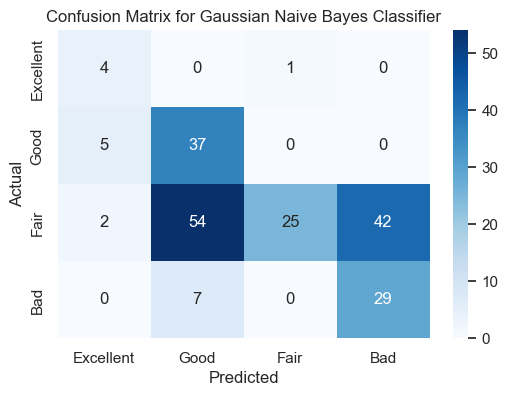

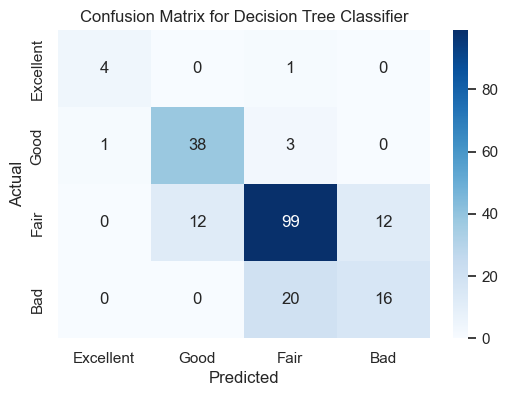

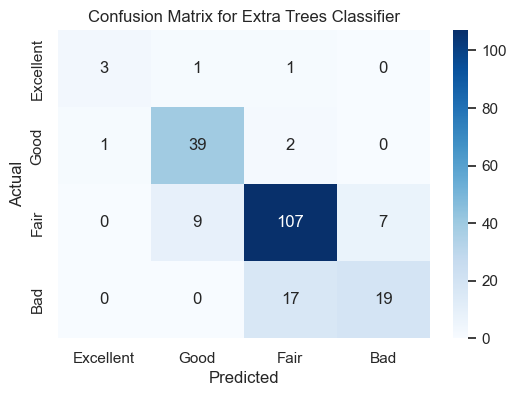

In [123]:
# Print confusion matrix

# Define class_labels for the confusion
class_labels = ['Excellent', 'Good', 'Fair', 'Bad']

# Print confusion matrices with color
def plot_confusion_matrix(y_true, y_pred, class_labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_lr, class_labels, "Confusion Matrix for Logistic Regression")
plot_confusion_matrix(y_test, y_pred_rf, class_labels, "Confusion Matrix for Random Forest Classifier")
plot_confusion_matrix(y_test, y_pred_svm, class_labels, "Confusion Matrix for SVM")
plot_confusion_matrix(y_test, y_pred_knn, class_labels, "Confusion Matrix for K-Nearest Neighbors")
plot_confusion_matrix(y_test, y_pred_gb, class_labels, "Confusion Matrix for Gradient Boosting Classifier")
plot_confusion_matrix(y_test, y_pred_mlp, class_labels, "Confusion Matrix for Multi-Layer Perceptron Classifier")
plot_confusion_matrix(y_test, y_pred_nb, class_labels, "Confusion Matrix for Gaussian Naive Bayes Classifier")
# plot_confusion_matrix(y_test, y_pred_ab, class_labels, "Confusion Matrix for Extreme Gradient Boost Classifier")
plot_confusion_matrix(y_test, y_pred_dt, class_labels, "Confusion Matrix for Decision Tree Classifier")
plot_confusion_matrix(y_test, y_pred_et, class_labels, "Confusion Matrix for Extra Trees Classifier")

Voting Classifier Accuracy: 0.7266536964980544

Voting Classifier Classification Report:
               precision    recall  f1-score   support

         Bad       0.88      0.51      0.65       156
   Excellent       0.95      0.58      0.72        33
        Fair       0.69      0.97      0.81       593
        Good       0.89      0.28      0.43       246

    accuracy                           0.73      1028
   macro avg       0.85      0.59      0.65      1028
weighted avg       0.77      0.73      0.69      1028



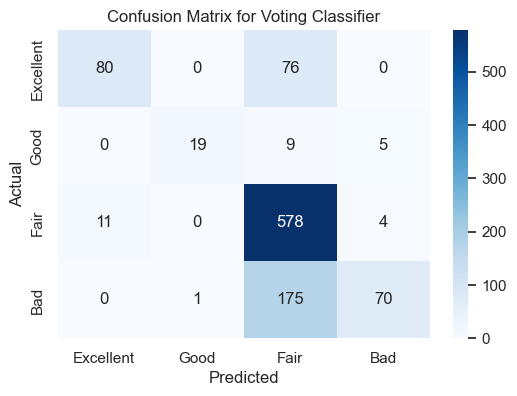

In [124]:
# Ensemble Learning Modelling of the base models with Cross-Validation -- Voting trial

# Import the required libraries
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold, KFold

# Create a list of base models
base_models = [('Logistic Regression', logistic_regression), ('Random Forest', random_forest), ('SVM', svm),
              ('Multi-Layer Perceptron', mlp), ('Gradient Boosting', gradient_boosting), ('Extra Trees', extra_trees)]

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=base_models, voting='hard')

# Perform cross-validation with the Voting Classifier using Stratified K-Folds
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Use cross_val_predict to get predictions
voting_predictions = cross_val_predict(voting_classifier, X, y, cv=stratified_cv)

# Evaluate the Voting Classifier
print("Voting Classifier Accuracy:", accuracy_score(y, voting_predictions))

# Print a detailed classification report
print("\nVoting Classifier Classification Report:\n", classification_report(y, voting_predictions))

# Create the confusion matrix
cm = confusion_matrix(y, voting_predictions)

# Plot the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Excellent", "Good", "Fair", "Bad"], yticklabels=["Excellent", "Good", "Fair", "Bad"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Voting Classifier")
plt.show()

Stacking Classifier Accuracy: 0.7714007782101168

Stacking Classifier Classification Report:
               precision    recall  f1-score   support

         Bad       0.61      0.35      0.45       156
   Excellent       0.65      0.39      0.49        33
        Fair       0.79      0.88      0.83       593
        Good       0.80      0.82      0.81       246

    accuracy                           0.77      1028
   macro avg       0.71      0.61      0.64      1028
weighted avg       0.76      0.77      0.76      1028



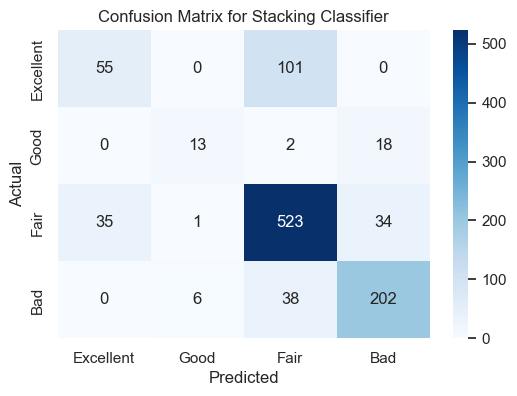

In [125]:
# Ensemble Learning Modelling of the base models with Cross-Validation -- Stacking trial

# Create a list of base models
base_models = [('Logistic Regression', logistic_regression), ('Random Forest', random_forest), ('SVM', svm),
              ('Multi-Layer Perceptron', mlp), ('Gradient Boosting', gradient_boosting), ('Extra Trees', extra_trees)]

# Create a Stacking Classifier with the base models and a meta-learner
stacking_classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=logistic_regression  # as the meta-learner
)

# Cross-validation with the Stacking Classifier
stacking_predictions = cross_val_predict(stacking_classifier, X, y, cv=10)

# Evaluate the models
print("Stacking Classifier Accuracy:", accuracy_score(y, stacking_predictions))

# Print a detailed classification report
print("\nStacking Classifier Classification Report:\n", classification_report(y, stacking_predictions))

# Create the confusion matrix
cm = confusion_matrix(y, stacking_predictions)

# Plot the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Excellent", "Good", "Fair", "Bad"], yticklabels=["Excellent", "Good", "Fair", "Bad"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Stacking Classifier")
plt.show()

Voting is preferred here since it has a higher Accuracy than Stacking

## Quality || RSRQ (dB) Prediction by Classification

### RSRQ Prediction || FOUR MOBILE NETWORK OPERATORS (3, EE, TESCO (O2), & Vodafone)

In [126]:
# Preprocess the dataframe by getting it ready for modelling

# Onehot-encoding df17: converting all categorical variables to 0s and 1s
df17 = pd.get_dummies(df13)
df17.head()

Longitude   Latitude  Speed  Operatorname  Operator           CGI   Node  \
0  -0.362750  53.770560      2             3     23420  2.342000e+14  50637   
1  -0.362850  53.770448      0             3     23420  2.342000e+14  50637   
2  -0.362850  53.770448      0             3     23420  2.342000e+14  50637   
3  -0.362850  53.770448      0             3     23420  2.342000e+14  50637   
4  -0.362985  53.770405      2             3     23420  2.342000e+14  50637   

   CellID   LAC  Level  ...  NODEHEX_C5CD  LACHEX_1C11  LACHEX_DA1  \
0      72  3489   -115  ...          True        False        True   
1      72  3489   -115  ...          True        False        True   
2      72  3489   -116  ...          True        False        True   
3      72  3489   -113  ...          True        False        True   
4      72  3489   -112  ...          True        False        True   

   DEVICE_samsung:SM-A326B:TP1A.220624.014  BAND_L1  BAND_L20  BAND_L28  \
0                                     True    False     False     False   
1                                     True    False     False     False   
2                                     True     True     False     False   
3                                     True    False     False     False   
4                                     True    False     False     False   

   BAND_L3  BAND_N28  BAND_N48  
0    False     False      True  
1    False     False      True  
2    False     False     False  
3    False     False      True  
4    False     False      True  

[5 rows x 148 columns]

In [127]:
# Replace values in 'Level' column based on specified conditions
df17['Qual'] = np.where(df17['Qual'] >= -8, 'Excellent', 
                np.where((df17['Qual'] >= -13) & (df17['Qual'] < -8), 'Good',
                np.where((df17['Qual'] >= -18) & (df17['Qual'] < -13), 'Fair', 'Poor')))

In [128]:
# View the unique quality (RSRQ) entries to be predicted
df17["Qual"].unique()

array(['Fair', 'Good', 'Poor'], dtype=object)

In [129]:
# Checking for duplicates
df17.duplicated().sum()

0

In [130]:
# Checking the current information in the dataframe
df17.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 0 to 1029
Columns: 148 entries, Longitude to BAND_N48
dtypes: bool(118), float64(4), int32(1), int64(24), object(1)
memory usage: 363.8+ KB


In [131]:
# Viewing the current rows and columns
df17

Longitude   Latitude  Speed  Operatorname  Operator           CGI  \
0     -0.362750  53.770560      2             3     23420  2.342000e+14   
1     -0.362850  53.770448      0             3     23420  2.342000e+14   
2     -0.362850  53.770448      0             3     23420  2.342000e+14   
3     -0.362850  53.770448      0             3     23420  2.342000e+14   
4     -0.362985  53.770405      2             3     23420  2.342000e+14   
...         ...        ...    ...           ...       ...           ...   
1025  -0.366692  53.770570      4             3     23420  2.342000e+14   
1026  -0.366527  53.770538      3             3     23420  2.342000e+14   
1027  -0.366355  53.770547      3             3     23420  2.342000e+14   
1028  -0.366197  53.770507      3             3     23420  2.342000e+14   
1029  -0.366197  53.770507      3             3     23420  2.342000e+14   

       Node  CellID   LAC  Level  ... NODEHEX_C5CD  LACHEX_1C11  LACHEX_DA1  \
0     50637      72  3489   -115  ...         True        False        True   
1     50637      72  3489   -115  ...         True        False        True   
2     50637      72  3489   -116  ...         True        False        True   
3     50637      72  3489   -113  ...         True        False        True   
4     50637      72  3489   -112  ...         True        False        True   
...     ...     ...   ...    ...  ...          ...          ...         ...   
1025  50637      72  3489   -108  ...         True        False        True   
1026  50637      72  3489   -101  ...         True        False        True   
1027  50637      72  3489   -106  ...         True        False        True   
1028  50637      72  3489   -100  ...         True        False        True   
1029  50637      72  3489   -103  ...         True        False        True   

      DEVICE_samsung:SM-A326B:TP1A.220624.014  BAND_L1  BAND_L20  BAND_L28  \
0                                        True    False     False     False   
1                                        True    False     False     False   
2                                        True     True     False     False   
3                                        True    False     False     False   
4                                        True    False     False     False   
...                                       ...      ...       ...       ...   
1025                                     True    False     False     False   
1026                                     True    False     False     False   
1027                                     True    False     False     False   
1028                                     True    False     False     False   
1029                                     True    False     False     False   

      BAND_L3  BAND_N28  BAND_N48  
0       False     False      True  
1       False     False      True  
2       False     False     False  
3       False     False      True  
4       False     False      True  
...       ...       ...       ...  
1025    False     False      True  
1026    False     False      True  
1027    False     False      True  
1028    False     False      True  
1029    False     False      True  

[1029 rows x 148 columns]

In [132]:
# Split the data into features (X) and labels (y)
X = df17.drop('Qual', axis=1)  # Adjust the label column name
y = df17['Qual'] # Quality to be predicted

# Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
# Regularization of the dataframe with standardscaler
scale_train = StandardScaler()
scale_train.fit(X_train)
X_train = scale_train.transform(X_train)
X_test = scale_train.transform(X_test)

In [134]:
# Initialize and train the classification base models for prediction

# Initialize models
logistic_regression = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier(n_neighbors=5)
gradient_boosting = GradientBoostingClassifier()
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)  # Initialize MLP
naive_bayes = GaussianNB()
# ada_boost = AdaBoostClassifier()
decision_tree = DecisionTreeClassifier()
extra_trees = ExtraTreesClassifier()

#Train Models
logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
mlp.fit(X_train, y_train)  # Fit MLP
naive_bayes.fit(X_train, y_train)
# ada_boost.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
extra_trees.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lr = logistic_regression.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_gb = gradient_boosting.predict(X_test)
y_pred_mlp = mlp.predict(X_test)  # MLP prediction
y_pred_nb = naive_bayes.predict(X_test)
# y_pred_ab = ada_boost.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)
y_pred_et = extra_trees.predict(X_test)
# y_pred_dnn = dnn.predict_classes(X_test)  # DNN prediction

In [135]:
# Evaluate the models -- Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Multi-Layer Perceptron Classifier Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Gaussian Naive Bayes Classifier Accuracy:", accuracy_score(y_test, y_pred_nb))
# print("AdaBoost Classifier Accuracy:", accuracy_score(y_test, y_pred_ab))
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Extra Trees Classifier Accuracy:", accuracy_score(y_test, y_pred_et))

Logistic Regression Accuracy: 0.8640776699029126
Random Forest Classifier Accuracy: 0.883495145631068
SVM Accuracy: 0.8009708737864077
K-Nearest Neighbors Accuracy: 0.6990291262135923
Gradient Boosting Classifier Accuracy: 0.8640776699029126
Multi-Layer Perceptron Classifier Accuracy: 0.8543689320388349
Gaussian Naive Bayes Classifier Accuracy: 0.6359223300970874
Decision Tree Classifier Accuracy: 0.8592233009708737
Extra Trees Classifier Accuracy: 0.8543689320388349


In [136]:
from sklearn.metrics import roc_auc_score

# Logistic Regression
y_pred_prob_lr = logistic_regression.predict_proba(X_test)
print("Logistic Regression ROC AUC:", roc_auc_score(y_test, y_pred_prob_lr, multi_class='ovr'))

# Random Forest Classifier
y_pred_prob_rf = random_forest.predict_proba(X_test)
print("Random Forest Classifier ROC AUC:", roc_auc_score(y_test, y_pred_prob_rf, multi_class='ovr'))

# SVM
svm_roc = SVC(probability=True)
svm_roc.fit(X_train, y_train)
y_pred_prob_svm = svm_roc.predict_proba(X_test)
print("SVM ROC AUC:", roc_auc_score(y_test, y_pred_prob_svm, multi_class='ovr'))

# K-Nearest Neighbors
y_pred_prob_knn = knn.predict_proba(X_test)
print("K-Nearest Neighbors ROC AUC:", roc_auc_score(y_test, y_pred_prob_knn, multi_class='ovr'))

# Gradient Boosting Classifier
y_pred_prob_gb = gradient_boosting.predict_proba(X_test)
print("Gradient Boosting Classifier ROC AUC:", roc_auc_score(y_test, y_pred_prob_gb, multi_class='ovr'))

# Multi-Layer Perceptron Classifier
y_pred_prob_mlp = mlp.predict_proba(X_test)
print("Multi-Layer Perceptron Classifier ROC AUC:", roc_auc_score(y_test, y_pred_prob_mlp, multi_class='ovr'))

# Gaussian Naive Bayes Classifier
y_pred_prob_nb = naive_bayes.predict_proba(X_test)
print("Gaussian Naive Bayes Classifier ROC AUC:", roc_auc_score(y_test, y_pred_prob_nb, multi_class='ovr'))

# Decision Tree Classifier
y_pred_prob_dt = decision_tree.predict_proba(X_test)
print("Decision Tree Classifier ROC AUC:", roc_auc_score(y_test, y_pred_prob_dt, multi_class='ovr'))

# Extra Trees Classifier
y_pred_prob_et = extra_trees.predict_proba(X_test)
print("Extra Trees Classifier ROC AUC:", roc_auc_score(y_test, y_pred_prob_et, multi_class='ovr'))

Logistic Regression ROC AUC: 0.9417299439232321
Random Forest Classifier ROC AUC: 0.9589026722905191
SVM ROC AUC: 0.925980885209873
K-Nearest Neighbors ROC AUC: 0.7592325678017793
Gradient Boosting Classifier ROC AUC: 0.971793008140291
Multi-Layer Perceptron Classifier ROC AUC: 0.9249758772176341
Gaussian Naive Bayes Classifier ROC AUC: 0.6969494084872462
Decision Tree Classifier ROC AUC: 0.8302554862176791
Extra Trees Classifier ROC AUC: 0.9230439234944253


In [137]:
# Print detailed classification reports
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("\nRandom Forest Classifier Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("\nK-Nearest Neighbors Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\nGradient Boosting Classifier Classification Report:\n", classification_report(y_test, y_pred_gb))
print("\nMulti-Layer Perceptron Classifier Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("\nGaussian Naive Bayes Classifier Classification Report:\n", classification_report(y_test, y_pred_nb))
# print("\nAdaBoost Classifier Classification Report:\n", classification_report(y_test, y_pred_ab))
print("\nDecision Tree Classifier Classification Report:\n", classification_report(y_test, y_pred_dt))
print("\nExtra Trees Classifier Classification Report:\n", classification_report(y_test, y_pred_et))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

        Fair       0.88      0.88      0.88       113
        Good       0.86      0.91      0.88        85
        Poor       0.67      0.25      0.36         8

    accuracy                           0.86       206
   macro avg       0.80      0.68      0.71       206
weighted avg       0.86      0.86      0.86       206


Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

        Fair       0.88      0.93      0.90       113
        Good       0.90      0.91      0.90        85
        Poor       0.00      0.00      0.00         8

    accuracy                           0.88       206
   macro avg       0.59      0.61      0.60       206
weighted avg       0.85      0.88      0.87       206


SVM Classification Report:
               precision    recall  f1-score   support

        Fair       0.82      0.83      0.82       113
     

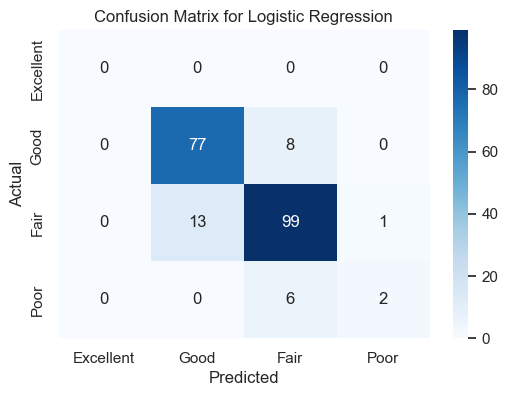

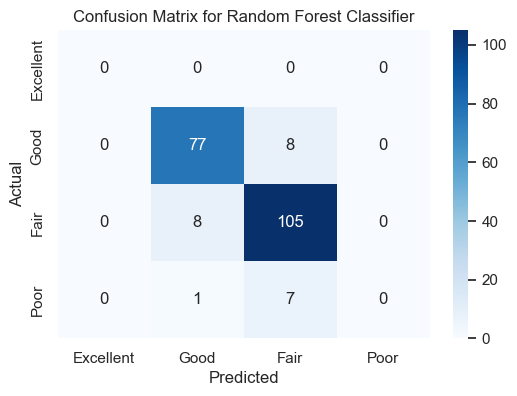

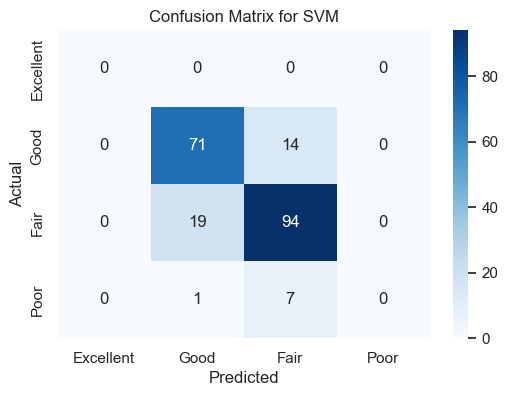

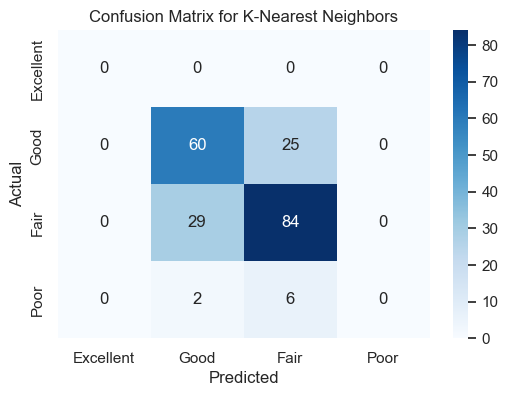

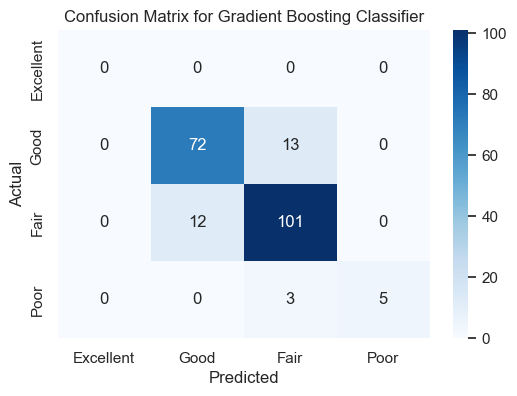

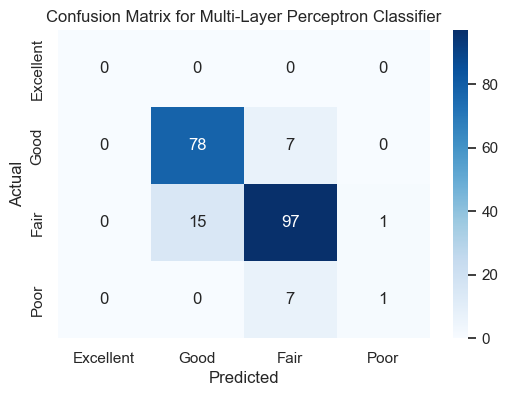

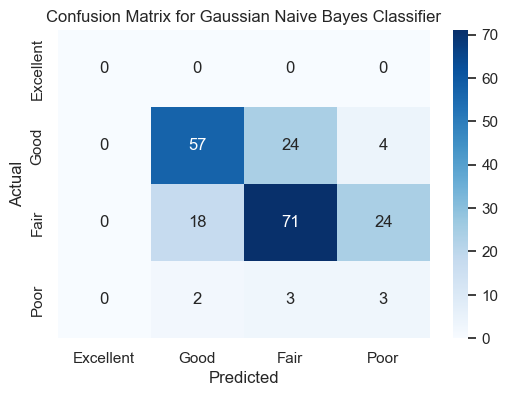

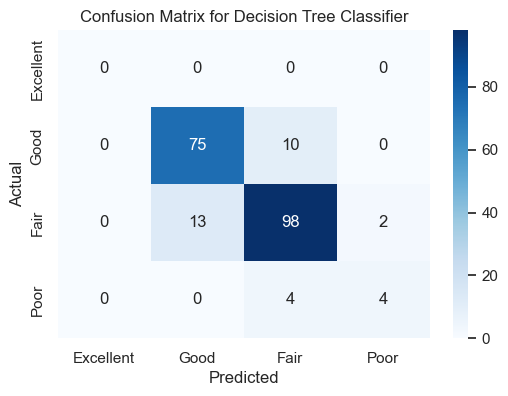

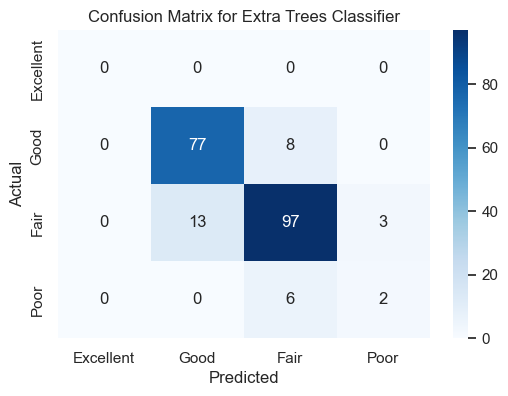

In [138]:
# Print confusion matrix

# Define class_labels for the confusion
class_labels = ['Excellent', 'Good', 'Fair', 'Poor']

# Print confusion matrices with color
def plot_confusion_matrix(y_true, y_pred, class_labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_lr, class_labels, "Confusion Matrix for Logistic Regression")
plot_confusion_matrix(y_test, y_pred_rf, class_labels, "Confusion Matrix for Random Forest Classifier")
plot_confusion_matrix(y_test, y_pred_svm, class_labels, "Confusion Matrix for SVM")
plot_confusion_matrix(y_test, y_pred_knn, class_labels, "Confusion Matrix for K-Nearest Neighbors")
plot_confusion_matrix(y_test, y_pred_gb, class_labels, "Confusion Matrix for Gradient Boosting Classifier")
plot_confusion_matrix(y_test, y_pred_mlp, class_labels, "Confusion Matrix for Multi-Layer Perceptron Classifier")
plot_confusion_matrix(y_test, y_pred_nb, class_labels, "Confusion Matrix for Gaussian Naive Bayes Classifier")
# plot_confusion_matrix(y_test, y_pred_ab, class_labels, "Confusion Matrix for AdaBoost Classifier")
plot_confusion_matrix(y_test, y_pred_dt, class_labels, "Confusion Matrix for Decision Tree Classifier")
plot_confusion_matrix(y_test, y_pred_et, class_labels, "Confusion Matrix for Extra Trees Classifier")

Voting Classifier Accuracy: 0.8328474246841594

Voting Classifier Classification Report:
               precision    recall  f1-score   support

        Fair       0.76      0.97      0.85       509
        Good       0.96      0.74      0.83       495
        Poor       0.00      0.00      0.00        25

    accuracy                           0.83      1029
   macro avg       0.57      0.57      0.56      1029
weighted avg       0.84      0.83      0.82      1029



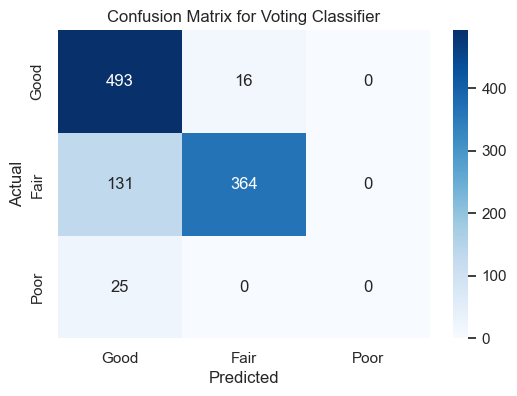

In [139]:
# Ensemble Learning Modelling of the base models with Cross-Validation -- Voting trial

# Create a list of base models
base_models = [('Logistic Regression', logistic_regression), ('Random Forest', random_forest), ('SVM', svm),
              ('Multi-Layer Perceptron', mlp), ('Gradient Boosting', gradient_boosting), ('Extra Trees', extra_trees)]

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=base_models, voting='hard')

# Perform cross-validation with the Voting Classifier using Stratified K-Folds
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Use cross_val_predict to get predictions
voting_predictions = cross_val_predict(voting_classifier, X, y, cv=stratified_cv)

# Evaluate the Voting Classifier
print("Voting Classifier Accuracy:", accuracy_score(y, voting_predictions))

# Print a detailed classification report
print("\nVoting Classifier Classification Report:\n", classification_report(y, voting_predictions))

# Create the confusion matrix
cm = confusion_matrix(y, voting_predictions)

# Plot the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Good", "Fair", "Poor"], yticklabels=["Good", "Fair", "Poor"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Voting Classifier")
plt.show()

Stacking Classifier Accuracy: 0.8454810495626822

Stacking Classifier Classification Report:
               precision    recall  f1-score   support

        Fair       0.84      0.85      0.85       509
        Good       0.87      0.87      0.87       495
        Poor       0.38      0.20      0.26        25

    accuracy                           0.85      1029
   macro avg       0.70      0.64      0.66      1029
weighted avg       0.84      0.85      0.84      1029



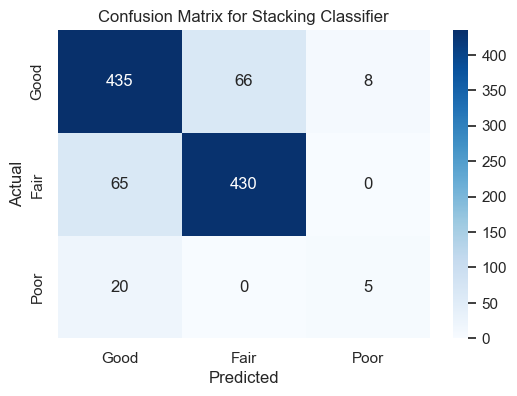

In [140]:
# Ensemble Learning Modelling of the base models with Cross-Validation -- Stacking trial

# Create a list of base models
base_models = [('Logistic Regression', logistic_regression), ('Random Forest', random_forest), ('SVM', svm),
              ('Multi-Layer Perceptron', mlp), ('Gradient Boosting', gradient_boosting), ('Extra Trees', extra_trees)]

# Create a Stacking Classifier with the base models and a meta-learner
stacking_classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=logistic_regression  # as the meta-learner
)

# Cross-validation with the Stacking Classifier
stacking_predictions = cross_val_predict(stacking_classifier, X, y, cv=10)

# Evaluate the models
print("Stacking Classifier Accuracy:", accuracy_score(y, stacking_predictions))

# Print a detailed classification report
print("\nStacking Classifier Classification Report:\n", classification_report(y, stacking_predictions))

# Create the confusion matrix
cm = confusion_matrix(y, stacking_predictions)

# Plot the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Good", "Fair", "Poor"], yticklabels=["Good", "Fair", "Poor"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Stacking Classifier")
plt.show()

Stacking is preferred here since it has a higher Accuracy than Voting